<a href="https://colab.research.google.com/github/Norberto27/Norberto27/blob/main/Desafio_Obligatorio__Clustering_Actividades_Deportivas_Martearena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**TEMA: DESAFIO CLUSTERING - ACTIVIDADES DIARIAS Y DEPORTIVA - SENSORES DE MOVIMIENTO**

#**AUTOR: NORBERTO MARTEARENA URQUIZA**



#**Introducción**


Objetivo del trabajo, se trata de explorar un extenso conjunto de datos, optimizar su manejo mediante almacenamiento en la nube y aplicar técnicas de aprendizaje no supervisado y supervisado para analizar su estructura y clasificar sus elementos. Se busca no solo entender la distribución de los datos sino también evaluar el rendimiento de modelos de clasificación para predecir etiquetas con precisión.”

Para llevar adelante esta tarea seguire las consignas mínimas exigidas por la docente y agregaré algunos análisis adicionales para enriquecer la comprensión del dataset y el rendimiento de los modelos.

#**Presentación y descripción del dataset**

**Presentación del dataset**:

El dataset contiene datos de movimientos capturados por sensores en el torso, brazos y piernas de ocho personas (4 mujeres y 4 hombres) mientras realizaban distintas actividades deportivas y diarias.

**Datos principales**:

Cada persona realizo 19 actividades durante 5 minutos cada una.

En el estudio, se usaron cinco dispositivos sensores colocados en diferentes partes del cuerpo: torso, brazo derecho, brazo izquierdo, pierna derecha y pierna izquierda. Cada uno de estos dispositivos contiene 9 tipos de sensores que capturan datos a 25 Hz.

El dato de “25 Hz” significa que cada uno de estos sensores registra datos 25 veces por segundo. Esta frecuencia de muestreo permite captar con precisión los movimientos y posturas de las personas en tiempo real, creando una serie temporal de alta resolución.

**Acelerómetros**:

Capturan aceleración en las direcciones x, y, z. Esto mide la rapidez con la que se mueven esas partes del cuerpo en cada eje.

**Giroscopios**:

Capturan la velocidad de rotación en los ejes x, y, z, midiendo los giros o cambios de orientación.

**Magnetómetros**:

Miden la orientación en relación con el campo magnético terrestre en los ejes x, y, z.


**Objetivo del análisis**:

Establecer patrones de movimiento mediante técnicas de clustering y reducción de dimensionalidad para entender mejor las diferencias y similitudes entre actividades deportivas.

Esta información puede ayudar a identificar patrones de movimiento específicos para mejorar la técnica y el rendimiento deportivo.

**Motivación y elección del dataset**:

El propósito de este análisis va más allá de cumplir con una tarea académica en aprendizaje no supervisado. Este proyecto representa una oportunidad para aplicar técnicas avanzadas de IA en un contexto que conecta mis intereses como coach deportivo y de vida con la práctica profesional de mis hijas, quienes se especializan en kinesiología, nutrición y psicología, todas áreas fundamentales en el deporte de alto rendimiento.

La elección de este dataset, que captura datos de actividades físicas mediante sensores de movimiento en distintas partes del cuerpo, es particularmente relevante para nosotros. Nos permitirá explorar cómo se pueden clasificar y analizar patrones en movimientos corporales, información crucial en la mejora de entrenamientos y la prevención de lesiones, así como en la comprensión de la respuesta corporal y emocional durante actividades de alto rendimiento.

Este trabajo, entonces, no solo es un ejercicio en técnicas de agrupamiento y reducción de dimensionalidad, sino una exploración de cómo el análisis de datos puede proporcionar insights profundos en nuestra labor diaria, potenciando nuestra habilidad para ofrecer un apoyo más holístico y basado en datos en el ámbito deportivo.




#**CARGA Y PREPARACION DE LOS DATOS**

la secuencia de bloques que pongo a continuacion son para realizar la carga de datos, el armado del data set y el posterior resguardo en la nube (Drive)

con el primer bloque se realiza la carga de todos los archivos que contienen todas las actividades registradas y el armado del Dataset

Con el segundo bloque de codificacion se resguarda el dataset generado en la nube (Google Drive)

con el tercero se recupera de la nube la version de dataset que se desea procesar

eL CUARTO BLOQUE ES SOLO PARA VERIFICAR EL DATASET ACTIVO


#**EL USUARIO DEBERA FIJARSE CON ATENCION CUALES DE LOS 4 BLOQUES INICIALES CORRER**


#**1. ESTE PASO SOLO SE EJECUTA CUANDO ES LA PRIMERA VEZ Y NO ESTA CARGADO EN DRIVE**


In [ ]:
# incorporo la librerias necesarias para la corrida
import pandas as pd
import glob
import os
from google.colab import drive

# Montar Google Drive, para poder guardar y acceder a los archivos
drive.mount('/content/drive')

# Definir la ruta de la carpeta de actividades en mi google drive
data_path = "/content/drive/My Drive/Dataset/data"

# Crear una lista para almacenar los datos de cada archivo
data_list = []

# Verificar la existencia de la ruta base
# en este punto fue mi primer inconveniente, donde , por no anotar bien la ruta
# no me encontraba los archivos
if not os.path.exists(data_path):
    print(f"Ruta no encontrada: {data_path}")
else:
    # Iterar sobre cada actividad en las carpetas 'a01' a 'a19'
    # aqui se trata de acceder a cada una de las carpetas "a01" a la "a19"
    # o sea a cada una de las 19 carpetas de archivos

    for activity_folder in sorted(glob.glob(os.path.join(data_path, 'a*'))):
        activity_code = os.path.basename(activity_folder)  # 'a01', 'a02', etc.
        print(f"Procesando actividad: {activity_code}")

        # En cada carpeta "a" Iterar sobre cada sujeto en la carpeta de cada actividad 'p1' a 'p8'
        for subject_folder in sorted(glob.glob(os.path.join(activity_folder, 'p*'))):
            subject_code = os.path.basename(subject_folder)  # 'p1', 'p2', etc.
            print(f"  Procesando sujeto: {subject_code}")

            # Iterar sobre cada archivo de segmento de datos 's01' a 's60'
            for segment_file in sorted(glob.glob(os.path.join(subject_folder, 's*.txt'))):
                segment_code = os.path.basename(segment_file).split('.')[0]  # 's01', 's02', etc.
                # print(f"    Procesando segmento: {segment_code}")

                # Cargar el archivo de texto en un DataFrame
                segment_data = pd.read_csv(segment_file, header=None)

                # Agregar columnas para la actividad, el sujeto y el segmento
                segment_data['activity'] = activity_code
                segment_data['subject'] = subject_code
                segment_data['segment'] = segment_code

                # Agregar el DataFrame a la lista definida al comienzo de este bloque
                data_list.append(segment_data)

    # Verificar si data_list tiene contenido
    if data_list:
        # Unir todos los DataFrames en uno solo
        data_df = pd.concat(data_list, ignore_index=True)
        # Mostrar las primeras filas del DataFrame final
        print(data_df.head())
    else:
        print("No se encontraron archivos para concatenar.")

# dado lo extenso de los archivos, se va monitoreando casa actividad y sujeto ejecutado como medida de control

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Procesando actividad: a01
  Procesando sujeto: p1
  Procesando sujeto: p2
  Procesando sujeto: p3
  Procesando sujeto: p4
  Procesando sujeto: p5
  Procesando sujeto: p6
  Procesando sujeto: p7
  Procesando sujeto: p8
Procesando actividad: a02
  Procesando sujeto: p1
  Procesando sujeto: p2
  Procesando sujeto: p3
  Procesando sujeto: p4
  Procesando sujeto: p5
  Procesando sujeto: p6
  Procesando sujeto: p7
  Procesando sujeto: p8
Procesando actividad: a03
  Procesando sujeto: p1
  Procesando sujeto: p2
  Procesando sujeto: p3
  Procesando sujeto: p4
  Procesando sujeto: p5
  Procesando sujeto: p6
  Procesando sujeto: p7
  Procesando sujeto: p8
Procesando actividad: a04
  Procesando sujeto: p1
  Procesando sujeto: p2
  Procesando sujeto: p3
  Procesando sujeto: p4
  Procesando sujeto: p5
  Procesando sujeto: p6
  Procesando sujeto: p7
  Procesando sujeto: p8

#**LA SIGUIENTE ACTIVIDAD, SE REALIZA UNICAMENTE SI ES LA PRIMERA VEZ QUE SE CORRE CON ESTE DATASET O SI SE MODIFICO POR ALGUN MOTIVO Y SE DESEA REGRABAR**

**Guardar el Dataset en Google Drive**

Dada la duracion del proceso de generacion del dataset para el estudio, con motivo de la amplitud del mismo, opte por implementar un proceso de carga, armado y guardado del dataset en la nube..

El principal beneficio de este enfoque, reside en la posibilidad de **evitar la recreacion del dataset** y ahorrar tiempos en futuras corridas.

**Exploración Inicial**: Despues del bloque 1 de armado del dataset  se muestra la estructura del dataset. Se realizo un profundo analisis del dataset armado considerando que todo estaba en  condiciones de su operacion.

Aquí están los pasos necesarios para guardar y cargar el dataset desde Google Drive. Esto permite usarlo en futuras sesiones sin necesidad de ejecutar el procesamiento desde cero

**Notas para el Usuario**

Uso de Pickle: El formato pickle es ideal para el trabajo interno en Python, ya que carga y guarda el dataset más rápidamente. (data_df.pkl)

Uso de CSV: El archivo CSV es útil si planeas compartir el dataset o verlo en otros programas como Excel, aunque es más lento para cargar en Python. (data_df.csv)

En esta codificacion, se incluyen, las dos versiones de grabacion, con los comentarios correspondientes, para que el usuario sepa qué hace cada una y cuándo usarlas:

#**2. Guardar el Dataset en Google Drive**

En la siguiente codificacion se guardan las dos versiones del dataset generado: .pickle y .CSV

In [ ]:
# ---- Guardar el Dataset ----
# Guardar como Pickle (más rápido para cargar en Pyathon, útil para trabajar dentro del notebook)
data_df.to_pickle('/content/drive/My Drive/Dataset/data_df.pkl')
print("Dataset guardado como 'data_df.pkl' en Google Drive.")

# Guardar como CSV (más compatible con otros programas, pero más lento para cargar en Python)
data_df.to_csv('/content/drive/My Drive/Dataset/data_df.csv', index=False)
print("Dataset guardado como 'data_df.csv' en Google Drive.")


Dataset guardado como 'data_df.pkl' en Google Drive.
Dataset guardado como 'data_df.csv' en Google Drive.


#**3. Este bloque permite reprocesar el trabajo partiendo del dataset guardado en la nube "Google DRIVE"**

en la siguiente codificacion estan las dos alternativas, o sea bajar la version "pickle" o la version "CSV", el usuario podra modificar la codificacion, para bajar una version o la otra. Ahora esta para bajar la version CSV.

In [ ]:

import pandas as pd
import glob
import os
from google.colab import drive


# ---- Cargar el Dataset en futuras sesiones ----
# Montar Google Drive (si no está montado aún)
drive.mount('/content/drive')

# Cargar desde Pickle (recomendado para cargas rápidas dentro del notebook)
# data_df = pd.read_pickle('/content/drive/My Drive/Dataset/data_df.pkl')
# print("Dataset cargado desde 'data_df.pkl'.")

# Cargar desde CSV (opción más compatible, pero más lenta)
data_df = pd.read_csv('/content/drive/My Drive/Dataset/data_df.csv')
print("Dataset cargado desde 'data_df.csv'.")


Mounted at /content/drive
Dataset cargado desde 'data_df.csv'.


In [ ]:
dataset=data_df

#**4. BLOQUE PARA VERIFICAR EL DATASET ACTIVO**


In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Montar Google Drive (si no está montado aún)
# drive.mount('/content/drive')

# Cargar desde CSV
# data_df = pd.read_csv('/content/drive/My Drive/Dataset/data_df.csv')
print("Dataset cargado desde 'data_df.csv'.")

# Mostrar las primeras filas para verificar la carga
print(data_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado desde 'data_df.csv'.
   T_xacc  T_yacc  T_zacc   T_xgyro   T_ygyro   T_zgyro   T_xmag    T_ymag  \
0  8.1305  1.0349  5.4217 -0.009461  0.001915 -0.003424 -0.78712 -0.069654   
1  8.1305  1.0202  5.3843 -0.009368  0.023485  0.001953 -0.78717 -0.068275   
2  8.1604  1.0201  5.3622  0.015046  0.014330  0.000204 -0.78664 -0.068277   
3  8.1603  1.0052  5.3770  0.006892  0.018045  0.005649 -0.78529 -0.069849   
4  8.1605  1.0275  5.3473  0.008811  0.030433 -0.005346 -0.78742 -0.068796   

    T_zmag  RA_xacc  ...  LL_zacc  LL_xgyro  LL_ygyro  LL_zgyro  LL_xmag  \
0  0.15730  0.70097  ...   2.6220 -0.000232 -0.012092 -0.004457  0.74017   
1  0.15890  0.71829  ...   2.6218 -0.014784 -0.016477  0.002789  0.73937   
2  0.15879  0.69849  ...   2.6366 -0.012770  0.005717 -0.007918  0.73955   
3  0.15912  0.72799  ...   2.6070 -0.005725  0.009620  0.0065

#**Asignación de Nombres a las Columnas**

Para facilitar el análisis, asignaré nombres claros a las columnas (COINCIDENTES CON EL BLOCK DE VARIABLES).

A continuación el proceso para etiquetar cada columna del sensor:

In [ ]:
column_names = [
    "T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
    "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
    "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
    "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
    "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag",
    "activity", "subject", "segment"
]
data_df.columns = column_names
dataset= data_df

#**5.3 Preprocesamiento del Dataset**


**Carga de Datos**


Se realizó una carga integral de los archivos de texto disponibles, que representan segmentos de señal correspondientes a actividades específicas y diversos sujetos. Este paso incluyó el desarrollo de un proceso automatizado para recorrer y organizar cientos de archivos en un solo DataFrame, añadiendo columnas adicionales para la identificación de cada actividad, sujeto y segmento. Debido a la gran cantidad de archivos, fue fundamental establecer una estructura clara y uniforme que permitiera el acceso y análisis eficiente de los datos.

**Exploración Inicial**:

Se realizó una revisión exhaustiva del dataset combinado para verificar la calidad de los datos y seleccionar las variables más relevantes para el análisis. En este caso, debido a la curación previa del dataset, se constató que no había valores faltantes ni duplicados significativos, por lo que no fue necesario aplicar técnicas de limpieza adicionales.

**Escalado de Características y Filtrado de Ruido**:

Dado que el dataset ya venía preprocesado y estandarizado, no se consideró necesario aplicar escalado adicional ni filtrado de ruido en esta etapa. La integridad y consistencia de los datos, revisadas en el paso anterior, aseguran que el dataset esté listo para los análisis posteriores sin requerir una normalización adicional ni técnicas de suavizado


#**Seleccionar las Columnas para el Primer Análisis**

Para la  primera corrida, usare las siguientes columnas:

Esta division la realizo para poder chequear los tiempos de ejecucion y un manejo mas simple del proceso en estudio

Torso (T): T_xacc, T_yacc, T_zacc, T_xgyro, T_ygyro, T_zgyro
Brazo Derecho (RA): RA_xacc, RA_yacc, RA_zacc, RA_xgyro, RA_ygyro, RA_zgyro
Pierna Derecha (RL): RL_xacc, RL_yacc, RL_zacc, RL_xgyro, RL_ygyro, RL_zgyro
Identificación de Actividad: activity

In [ ]:
# Selección de columnas iniciales para el análisis basado en el torso (T) y brazo derecho (RA)
columnas_seleccionadas = ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro',
                          'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro',
                          'activity']

# Filtramos el dataset para obtener sólo las columnas seleccionadas
dataset_seleccionado = dataset[columnas_seleccionadas]

# Mostrar las primeras filas del dataset seleccionado
dataset_seleccionado.head()


,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,RA_xacc,RA_yacc,RA_zacc,RA_xgyro,RA_ygyro,RA_zgyro,activity
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,0.70097,5.6829,7.9812,0.003876,-0.005213,-0.001168,a01
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,0.71829,5.6005,7.9712,0.012862,-0.005241,-0.003029,a01
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,0.69849,5.6612,7.9568,0.021639,-0.010421,0.011992,a01
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,0.72799,5.6393,7.9763,0.016440,0.001875,0.002322,a01
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,0.71572,5.6441,7.9714,0.000286,-0.003408,0.002425,a01


A continuacion se presentan los criterios de selección de variables, el objetivo de investigación y los resultados esperados en el notebook para el análisis inicial. Esto ayudará a que quien revise el notebook entienda claramente las razones detrás de las decisiones de selección de columnas y el enfoque del análisis.

#**1. Selección de Variables y Criterio**

**Criterio de Selección de Variables:**

Para este primer análisis, he seleccionado un conjunto de variables basadas en las lecturas de aceleración y giroscopio del torso (T) y del brazo derecho (RA) de los participantes.

Estas variables fueron elegidas debido a que el torso y el brazo derecho suelen reflejar movimientos significativos y representativos en actividades físicas, que son el foco de este conjunto de datos.

La aceleración en los ejes x, y, z,(T_xacc, T_yacc, T_zacc, RA_xacc, RA_yacc, RA_zacc) nos proporciona información sobre el cambio en la velocidad del movimiento en distintas direcciones, mientras que los datos del giroscopio (T_xgyro, T_ygyro, T_zgyro, RA_xgyro, RA_ygyro, RA_zgyro) nos permiten analizar la rotación del torso y del brazo derecho.

Este enfoque permitirá observar tanto los movimientos lineales como los rotacionales en las actividades.

Además, inclui la columna "activity", que contiene el código de actividad correspondiente, ya que el objetivo es investigar cómo varían los patrones de movimiento entre diferentes actividades.

El hecho de que solo se hayan usado 12 variables normalmente se realiza haciendo una seleccion  de características para enfocarse en las que presumiblemente son más relevantes para la clasificación en cuestión.

Tal accion y seleccion se realiza  a través de técnicas previas de selección de características, basadas en su correlación con la variable objetivo o su importancia en análisis exploratorios iniciales.

En esta oportnidad se recurrio a la consulta con profesionales en deportologia, kinesiologos, nutricionistas, psicologos del deporte y expertos en entrenamientos de alto rendimiento en CrossFit (en todos los casos profesionales vinculados a programas de fuerza y acondicionamiento basado en movimientos funcionales constantemente variados y ejecutados a alta intensidad)

Podría ser beneficioso en estudios futuros analizar la contribución de algunas de las variables restantes, ya que algunas de ellas podrían tener información complementaria que mejore aún más la precisión de los modelos

#**2. Objetivo de Investigación**

**Objetivo del Análisis:**

El objetivo de este análisis es identificar patrones distintivos de movimiento que diferencian cada tipo de actividad registrada en el conjunto de datos.

Al enfocar el análisis en las mediciones del torso y el brazo derecho, se espera poder clasificar correctamente la actividad en función de estas variables.

Esto es particularmente relevante para aplicaciones que monitorean la actividad física, tales como dispositivos de monitoreo de salud y entrenamiento.

En etapas posteriores, este análisis preliminar permitirá establecer un marco para implementar un modelo de clasificación automatizada de actividades basado en aprendizaje automático supervisado o técnicas de aprendizaje por refuerzo.

#**3. Resultados Esperados**

**Resultados Esperados:**

Esperamos observar una diferencia en las lecturas de aceleración y giroscopio entre distintas actividades, reflejada en patrones únicos para cada actividad (por ejemplo, caminar, correr, estar de pie). Con base en estos patrones, el análisis inicial debería permitir:

1. Diferenciar de manera general las actividades en función de las variables de aceleración y giroscopio seleccionadas.

2. Identificar variables con variaciones significativas entre actividades, lo que puede guiar la selección de características en un modelo de clasificación posterior.

Estos resultados preliminares podrían ser la base para aplicar técnicas de aprendizaje supervisado o por refuerzo en etapas futuras para una clasificación automática de actividades.





#**Expectativas sobre este tipo de Analisis**

Este tipo de análisis y datos es una herramienta muy valiosa para profesionales de la salud y entrenadores en deportes.

Los datos de aceleración y giroscopio proporcionan información detallada sobre el movimiento y el equilibrio, lo que puede ser fundamental para mejorar el rendimiento deportivo, prevenir lesiones y diseñar programas de entrenamiento personalizados.

A continuación, explico algunos puntos específicos de cómo esta información puede beneficiar a ambos grupos:

**Monitoreo del Rendimiento**:

Los entrenadores pueden usar estos datos para observar patrones específicos de movimiento en distintas actividades, como correr, saltar o levantar peso.

Esto permite evaluar si los deportistas están ejecutando los movimientos correctamente o si hay alguna desviación que podría afectar el rendimiento.

**Prevención de Lesiones**:

Para los profesionales de la salud, como kinesiologos, fisioterapeutas y médicos deportivos, los datos de movimiento pueden ayudar a detectar posibles riesgos de lesiones.

Por ejemplo, si se observan desequilibrios o movimientos repetitivos que sobrecargan ciertas áreas del cuerpo, los especialistas pueden intervenir antes de que estos patrones resulten en una lesión.

**Optimización de Entrenamientos**:

Al analizar el movimiento en detalle, los entrenadores y los profesionales de salud, incluyendo Nutricionistas, pueden ajustar los entrenamientos y la alimentación para maximizar la eficiencia.

Pueden, por ejemplo, identificar cuál es el movimiento óptimo para un corredor o para un levantador de pesas y ayudar a los atletas a perfeccionar estos movimientos.

**Recuperación y Rehabilitación**:

En casos de rehabilitación, los datos permiten a los kinesiologos,fisioterapeutas y nutricionistas, seguir de cerca el progreso de un atleta. A través del monitoreo continuo, pueden adaptar el programa de recuperación en función de cómo se está moviendo el paciente y asegurarse de que la recuperación esté progresando de manera segura.

**Feedback en Tiempo Real**: Con dispositivos de monitoreo portátiles y el análisis de estos datos, los atletas y entrenadores pueden recibir información en tiempo real sobre su rendimiento. Esto puede ayudar a realizar ajustes instantáneos durante el entrenamiento, mejorando la calidad del ejercicio y evitando malas posturas.

**En Conclusión**

Este análisis de datos de movimiento abre muchas posibilidades para mejorar el rendimiento deportivo y la salud de los atletas. La colaboración entre profesionales de la salud y entrenadores con datos basados en evidencia permite un enfoque integral en el entrenamiento y el bienestar del deportista. Esta herramienta puede ser una gran aliada para aquellos que buscan llevar el rendimiento y la seguridad de sus atletas al siguiente nivel.

#**5.3 Explicación del Objetivo**

En lugar de justificar "por qué aplicaré aprendizaje por refuerzo" (ya que no corresponde al análisis no supervisado), explicaré por qué se eligió aprendizaje no supervisado (clustering o reducción de dimensionalidad) para el análisis de mi dataset.

“Aunque el enunciado menciona aprendizaje por refuerzo, el objetivo inicial especificado en el punto 5.1, fue aplicar aprendizaje no supervisado. Esto se alinea con las características del dataset y los objetivos de este análisis, ya que busco descubrir patrones o agrupaciones naturales en los datos sin etiquetas predefinidas.”



#**Aplicación de PCA al dataset con las variables seleccionadas (no con el dataset completo)**


**ESTE MODULO, SE CORRIO DOS VECES DADO QUE EN LA PRIMER CORRIDA NO DIERON BUENOS RESULTADOS, AQUI SE ELEVO EL NUMERO DE VARIABLES A TRATAR A 3, 5 y 12, PARA TODAS LAS ACTIVIDADES. LUEGO SE HACEN LAS EXPLICACIONES Y COMPARATIVAS DE LA APLICACION DE PCA Y K-MEANS**

**Objetivo de aplicar PCA**

PCA es una técnica de reducción de dimensionalidad que tiene como objetivo transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, llamadas "componentes principales."

**Objetivo de aplicar K-means**

K-means es un algoritmo de agrupamiento (clustering) cuyo objetivo principal es agrupar los datos en subconjuntos o "clusters" de modo que los elementos dentro de cada grupo sean más similares entre sí que con elementos de otros grupos.

**Aplicación conjunta de PCA y K-means**

Usar PCA y K-means en conjunto, por lo que pude observar durante este aprendizaje, es una práctica común en el análisis de datos:

Primero, PCA reduce la dimensionalidad, eliminando ruido y redundancias. Esto permite simplificar el conjunto de datos, haciendo que el agrupamiento sea más eficiente y efectivo.

Después, se aplica K-means sobre los datos transformados, lo cual facilita la identificación de patrones y estructuras que habrían sido difíciles de detectar en un espacio de alta dimensionalidad.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Verificar si "activity", "subject" o "segment" están en dataset_seleccionado
# coloco aqui los elementos de identificacion de cada registro para eliminarlos y dejar solo los datos numericos
columnas_a_eliminar = [col for col in ["activity", "subject", "segment"] if col in dataset_seleccionado.columns]

# Usar el dataset con las variables seleccionadas
variables_numericas = dataset_seleccionado.drop(columns=columnas_a_eliminar)

# Escalar los datos por si tuvieramos datos en distintas escalas
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(variables_numericas)

# Aplicar PCA y reducir a, por ejemplo, 2 o 3 componentes para visualizar, en este caso 2
pca = PCA(n_components=2)  # Ajusto el número según el análisis de varianza deseado
datos_pca = pca.fit_transform(datos_escalados)

# Crear un DataFrame de los componentes principales
pca_df = pd.DataFrame(data=datos_pca, columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, dataset_seleccionado[["activity"]].reset_index(drop=True)], axis=1)

# Verificar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(pca_df.head())


Varianza explicada por cada componente: [0.13606859 0.12854029]
        PC1       PC2 activity
0 -0.482766 -0.508440      a01
1 -0.493351 -0.496772      a01
2 -0.490901 -0.477824      a01
3 -0.496443 -0.474134      a01
4 -0.489625 -0.494778      a01


**APLICACION DE K-MEANS EN ESTA PRIMER CORRIDA CON n-cluster=3**

en este caso toma el data set creado por PCA y realiza su tarea el K_means
Objetivo de aplicar PCA
PCA es una técnica de reducción de dimensionalidad que tiene como objetivo transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, llamadas "componentes principales."

descubrir información útil o patrones significativos en los datos

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-means con un número de clusters (se debe ajustar en base al conocimiento del dataset)
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajustar el número de clusters según sea necesario en esta corrida en 3
# random-state=42, hace que siempre cuando se ejecute estes bloque los numeros aleatorios comiencen en el mismo valor
kmeans.fit(pca_df[["PC1", "PC2"]])

# Añadir etiquetas de clusters al DataFrame de PCA
pca_df["Cluster"] = kmeans.labels_

# Visualizar el resultado de K-means
print(pca_df.head())


        PC1       PC2 activity  Cluster
0 -0.482766 -0.508440      a01        2
1 -0.493351 -0.496772      a01        2
2 -0.490901 -0.477824      a01        2
3 -0.496443 -0.474134      a01        2
4 -0.489625 -0.494778      a01        2


#**Interpretacion de resultados**

 Varianza Explicada por Cada Componente

La salida "Varianza explicada por cada componente: [0.13606859, 0.12854029]" se refiere a la cantidad de variabilidad del conjunto de datos original que cada componente principal (PC1 y PC2) logra capturar. Estos valores indican el porcentaje de varianza que explica cada uno de los dos primeros componentes principales, en este caso:

PC1: Explica aproximadamente el 13.6% de la varianza total en el conjunto de datos.

PC2: Explica aproximadamente el 12.8% de la varianza total en el conjunto de datos.

En general, cuanto mayor sea el porcentaje de varianza explicada por los primeros componentes, mayor será la capacidad de los componentes para capturar la estructura de los datos en menos dimensiones.

Si bien, en este caso, estos valores indican que solo una fracción de la varianza total se explica con estos dos componentes, lo realice para aprender y tomar contacto con el formato, contenido y significados, donde observo que debo incorporar más componentes para capturar la mayoría de la variabilidad en los
datos

Valores de las Observaciones en los Componentes Principales (PC1 y PC2)

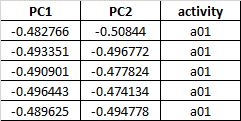

Cada fila muestra las coordenadas de una observación proyectada en el espacio reducido de los componentes principales. Aquí, las primeras cinco observaciones están representadas en el nuevo espacio bidimensional definido por PC1 y PC2.

La columna activity muestra la etiqueta "a01" para cada observación, lo que indica que todos estos datos pertenecen a una misma actividad o clase (en este caso, "a01").

Los valores en las columnas PC1 y PC2 muestran qué tan "lejos" están las observaciones respecto al origen (0,0) en el nuevo espacio de dimensiones reducidas. Los componentes principales (PC1 y PC2) son combinaciones lineales de las variables originales que maximizan la varianza en cada dirección. Estas nuevas dimensiones están diseñadas para captar la mayor cantidad posible de información, eliminando redundancias entre variables correlacionadas.

**Resumen de Resultados**

PC1 y PC2 capturan el 13.6% y el 12.8% de la varianza, respectivamente, una fracción de la variabilidad total.

La representación en dos dimensiones (PC1 y PC2) es útil para visualizar tendencias generales, aunque solo contiene una parte de la información original.

Para una interpretación más completa, incluire a continuacion más componentes o podria analizar las cargas para entender la contribución de cada variable en estos componentes, que lo hare en un nuevo ensayo en otra oportunid.

**Resumen de Resultados K_means**

En esta sección se ha aplicado el algoritmo de K-means para agrupar los datos en tres clusters, según lo establecido en n_clusters=3. Este algoritmo asigna cada punto de datos (en este caso, las coordenadas en los componentes principales, PC1 y PC2) a uno de los clusters basándose en la similitud.

Interpretación de los resultados:

Tomando lo que deja PCA, los Componentes Principales (PC1 y PC2), producto de la reducción dimensional, son usados aquí para simplificar la visualización de los grupos.

Cluster: La columna Cluster indica el grupo asignado a cada punto de datos según el análisis de K-means.

Interpretación de los Clusters: La asignación de los datos al cluster 2, por ejemplo, implica que estos puntos comparten características latentes en el espacio reducido de PC1 y PC2. En un análisis más amplio, enseguida, exploraremos cómo cada cluster corresponde a posibles patrones de actividad (activity) en el dataset. Esta agrupación puede ayudar a entender mejor las similitudes o diferencias entre actividades (como a01 en este ejemplo).


prueba con 5 componentes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Verifica si "activity", "subject" o "segment" están en dataset_seleccionado
columnas_a_eliminar = [col for col in ["activity", "subject", "segment"] if col in dataset_seleccionado.columns]

# Usar el dataset con las variables seleccionadas
variables_numericas = dataset_seleccionado.drop(columns=columnas_a_eliminar)

# Escalar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(variables_numericas)

# Aplicar PCA y reducir a, por ejemplo, 5 componentes para visualizar
# pca = PCA(n_components=5)  # Ajusta el número según el análisis de varianza deseado
pca = PCA(n_components=5)  # Ajusta el número según el análisis de varianza deseado
datos_pca = pca.fit_transform(datos_escalados)

# Crear un DataFrame de los componentes principales
pca_df = pd.DataFrame(data=datos_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df = pd.concat([pca_df, dataset_seleccionado[["activity"]].reset_index(drop=True)], axis=1)

# Verificar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(pca_df.head())


Varianza explicada por cada componente: [0.13606859 0.12854029 0.10816613 0.09356176 0.08724788]
        PC1       PC2       PC3       PC4       PC5 activity
0 -0.482766 -0.508440  1.069779  0.620794  0.197569      a01
1 -0.493351 -0.496772  1.049174  0.604094  0.218883      a01
2 -0.490901 -0.477824  1.061227  0.609903  0.209093      a01
3 -0.496443 -0.474134  1.058203  0.605553  0.219992      a01
4 -0.489625 -0.494778  1.052299  0.587785  0.209413      a01


en forma muy simplificada puedo interpretar que  con 5 componentes principales en PCA, se observarn los siguientes resultados:

Varianza explicada: Cada uno de los 5 componentes principales explica un porcentaje de la varianza en el conjunto de datos:

Primer componente (PC1): 13.6%

Segundo componente (PC2): 12.85%

Tercer componente (PC3): 10.82%

Cuarto componente (PC4): 9.36%

Quinto componente (PC5): 8.72%

Al sumar estos valores, obtenemos aproximadamente el 55% de la varianza total explicada por estos 5 componentes. Esto indica que más de la mitad de la información en el dataset original ha sido capturada en estos cinco componentes principales. Aunque no es el 100%, este porcentaje es razonable para reducir la dimensionalidad, ya que permite simplificar el análisis y permite realizar algoritmos de agrupamiento (como el que estoy utilizando: K-means) o visualizaciones sin demasiada pérdida de información.

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-means con un número de clusters (ajusta según tu conocimiento del dataset)
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según sea necesario
kmeans.fit(pca_df[["PC1", "PC2", "PC3", "PC4", "PC5"]])

# Añadir etiquetas de clusters al DataFrame de PCA
pca_df["Cluster"] = kmeans.labels_

# Visualizar el resultado de K-means
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5 activity  Cluster
0 -0.482766 -0.508440  1.069779  0.620794  0.197569      a01        2
1 -0.493351 -0.496772  1.049174  0.604094  0.218883      a01        2
2 -0.490901 -0.477824  1.061227  0.609903  0.209093      a01        2
3 -0.496443 -0.474134  1.058203  0.605553  0.219992      a01        2
4 -0.489625 -0.494778  1.052299  0.587785  0.209413      a01        2


Interpretacion breve de resultados

Cluster: La columna Cluster indica el grupo asignado a cada punto de datos según el análisis de K-means. En este caso se tomo n_cluster = 4

Interpretación de los Clusters: La asignación de los datos al cluster 2, por ejemplo, implica que estos puntos comparten características latentes en el espacio reducido de PC1 y PC2.

Se aprecia obviamente que es el mismo que con n=3 y con 5 componentes. A continuacion se grafica y luego se procede a realizar un diagrama el diagrama de codo para hacer una mejor estimacion del numero de clusters a utilizar. En un análisis más amplio, enseguida, exploraremos cómo cada cluster corresponde a posibles patrones de actividad (activity) en el dataset. Esta agrupación puede ayudar a entender mejor las similitudes o diferencias entre actividades (como a01 en este ejemplo).

#**prueba y graficacion del K_means con n-cluster=5, segun sugiere el diagrama del codo, que figura mas adelante**

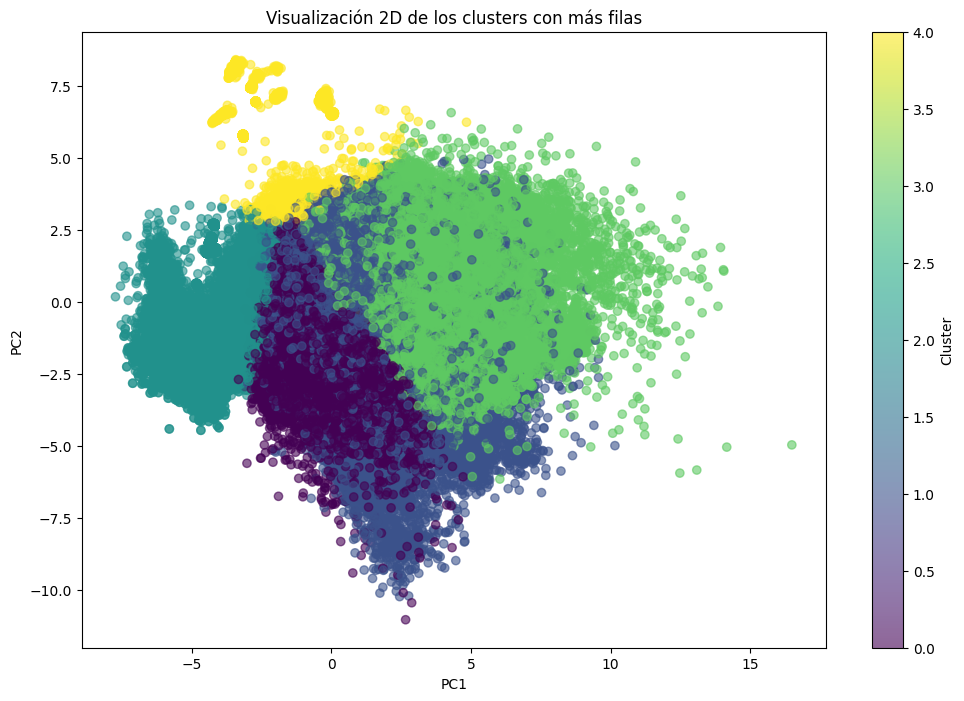

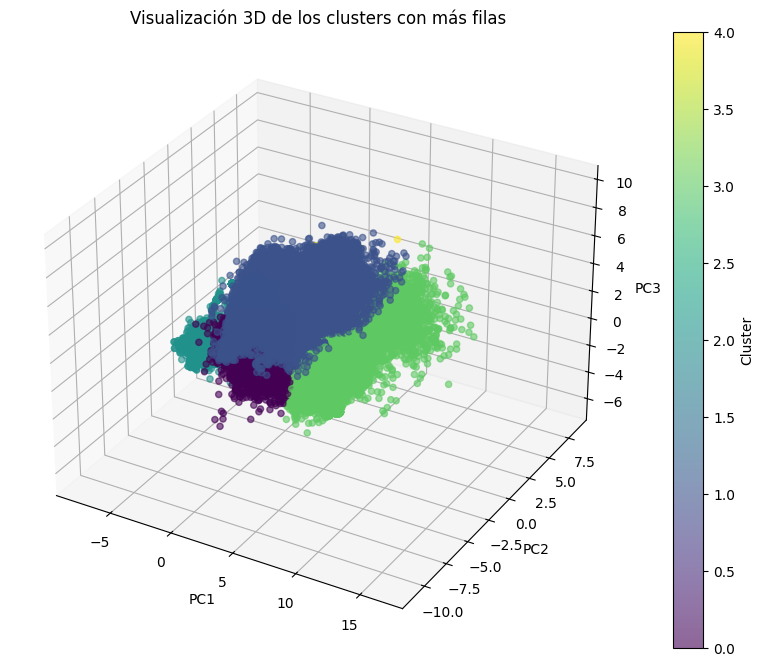

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ajustar K-means con un número mayor de clusters
n_clusters = 5  # Cambiar este número de acuerdo a las necesidades
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(datos_pca)

# Visualización en 2D sobre 2 componentes
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Cluster"], cmap="viridis", alpha=0.6)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización 2D de los clusters con más filas")
plt.show()

# Visualización en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["Cluster"], cmap="viridis", alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter, label="Cluster")
plt.title("Visualización 3D de los clusters con más filas")
plt.show()


#**Interpretación del Gráfico de Clusters con K-means  -  2d**

El gráfico muestra la distribución de los datos en el espacio de los dos primeros componentes principales (PC1 y PC2), usando el algoritmo de K-means con 5 clusters. Cada punto representa una observación, y el color indica el cluster al cual pertenece.

**Puntos clave**:

**Clusters diferenciados**: Los colores distintos representan cinco grupos diferentes (clusters), cada uno con características únicas en relación con las dimensiones de PC1 y PC2.

**Distribución de los Clusters**:

Se observa que algunos clusters, como el cluster verde y el púrpura oscuro, son más densos y abarcan una mayor área en el centro. Otros, como el amarillo en la parte superior, tienen menor densidad y ocupan áreas más pequeñas, indicando posiblemente observaciones más atípicas o diferenciadas.

**Superposición parcial**:

Existen áreas donde los clusters se superponen ligeramente, lo que podría sugerir similitudes en algunas características entre los puntos de estos clusters.

Este gráfico permite visualizar cómo se agrupan las observaciones principales y ayuda a identificar patrones o diferencias en los datos luego de aplicar K-means con 5 clusters.

##**Representacioon en grtafico 3D**

La falta de visibilidad del cluster amarillo en la visualización 3D podría deberse a varias razones, entre ellas:

**Distribución en el espacio 3D**: El cluster amarillo podría estar localizado en un área que no es visible desde el ángulo actual de la gráfica 3D. A veces, ciertos puntos o clusters están más cercanos a otros ejes o planos, lo cual puede ocultarlos desde ciertos ángulos.

**Tamaño y cantidad de puntos**: Si el cluster amarillo tiene pocos puntos en comparación con los otros clusters, es posible que estos puntos estén dispersos y menos densos, haciéndolos menos visibles en el gráfico 3D.

**Escalado y solapamiento**: Los puntos de otros clusters pueden estar cubriendo parcialmente o completamente los puntos del cluster amarillo, especialmente si el cluster amarillo se encuentra dentro o cerca del área ocupada por los clusters más grandes.

**Profundidad en los componentes**: En algunos casos, el cluster amarillo podría tener valores de PC3 que lo posicionen en una “profundidad” que no es fácilmente visible desde la perspectiva actual.

Cambiar el ángulo de vista en la visualización 3D puede ayudar a confirmar si los puntos amarillos están presentes en otras áreas del espacio.

#**Prueba del PCA Y K_means con las todas las variables seleccionadas (12 componentes)**


In [ ]:
from sklearn.preprocessing import StandardScaler

# Supongamos que 'dataset' es tu DataFrame y contiene las 12 variables
# Seleccionar solo las columnas numéricas, excluyendo la columna 'activity'
columnas_numericas = dataset.select_dtypes(include=['float64', 'int64']).columns
datos_numericos = dataset[columnas_numericas]

# Estandarizar los datos numéricos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_numericos)

# Convertir los datos escalados a un DataFrame
datos_escalados_df = pd.DataFrame(datos_escalados, columns=columnas_numericas)

# Agregar la columna de actividad al DataFrame escalado (si es necesario)
datos_escalados_df['activity'] = dataset['activity'].values



In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Aplicar PCA
pca = PCA(n_components=12)  # O 10, según lo que se necesite
datos_pca = pca.fit_transform(datos_escalados_df[columnas_numericas])

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=datos_pca, columns=[f'PC{i+1}' for i in range(12)])  #
pca_df['activity'] = datos_escalados_df['activity'].values  # Añadir la columna de actividad

# Verificar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(pca_df.head())

# Aplicar K-means
kmeans = KMeans(n_clusters=5)  # O el número de clusters que desees
pca_df['Cluster'] = kmeans.fit_predict(datos_pca)

# Ver los resultados
print(pca_df.head())


Varianza explicada por cada componente: [0.13220556 0.11310334 0.07757021 0.05825861 0.04409611 0.03574491
 0.03451523 0.03392264 0.03309825 0.02768063 0.02619284 0.02581423]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.035647  0.048973 -0.536626  0.080639 -0.898439 -0.621744 -0.627961   
1 -0.031787  0.059711 -0.534579  0.085434 -0.906795 -0.620631 -0.621170   
2 -0.030784  0.052926 -0.532434  0.060510 -0.904404 -0.611102 -0.620820   
3 -0.026170  0.064405 -0.510434  0.072566 -0.936496 -0.625821 -0.613533   
4 -0.032211  0.054825 -0.535285  0.085068 -0.902048 -0.626126 -0.627056   

        PC8       PC9      PC10      PC11      PC12 activity  
0 -1.120007 -0.032253  1.924782  0.000039  0.184637      a01  
1 -1.134875 -0.031647  1.912388 -0.024796  0.205608      a01  
2 -1.135559 -0.029885  1.916185  0.004004  0.173437      a01  
3 -1.139066 -0.018529  1.926011 -0.005826  0.180679      a01  
4 -1.138540 -0.027660  1.905145 -0.034160  0.185166      a0

Resumen comentarios simplificado de este proceso con 12 componentes (variables)

**Interpretación de la varianza explicada por los componentes principales**

Varianza explicada: La lista [0.13220556, 0.11310334, ..., 0.02581423] muestra la proporción de la varianza total de los datos que explica cada componente principal (PC). Por ejemplo:

PC1 explica el 13.2% de la varianza, seguido de PC2 con 11.3%, y así sucesivamente.

Los primeros componentes son los más relevantes, ya que cada uno representa la mayor parte de la variabilidad en los datos. A medida que avanzamos hacia PC12, cada componente captura menos información relevante.
Aunque hay 12 componentes, los primeros 3-4 ya explican una buena cantidad de la variabilidad. En general, esto permite reducir la complejidad de los datos, manteniendo información esencial y eliminando el "ruido" que puedan contener las variables originales.

Importancia de la reducción de dimensionalidad: Al reducir las variables a unas pocas componentes principales (en este caso, 12 en lugar de las variables originales), se facilita la visualización y análisis sin sacrificar demasiada información. Esto permite identificar patrones generales de actividad de manera más clara y rápida.

**Interpretación de los resultados de clustering**

Asignación a clusters: Los resultados muestran que, tras aplicar el algoritmo K-means, los datos se agrupan en clusters. En el caso visto, tomando las cinco primeras filas y 12 columnas, el cluster asignado es el "2", que indica que las observaciones en este cluster tienen patrones de características similares.

Cluster 2 podría representar un grupo de actividad particular que comparte características comunes en sus componentes principales, por ejemplo, movimientos similares o niveles de intensidad de actividad que se podrían relacionar con ciertos comportamientos o tipos de ejercicio.

**Aplicación en un contexto práctico:**

Para los entrenadores o profesionales de la salud, estos clusters ayudan a identificar grupos de actividad similares. Por ejemplo, si el cluster "2" representa ciertos patrones de movimiento, se podría usar esta información para ajustar los entrenamientos en función del grupo específico, enfocándose en patrones de movimiento que beneficien a ciertos grupos de personas.

Además, identificar a qué cluster pertenece una actividad puede ayudar en el monitoreo de la consistencia de ciertos movimientos o incluso en la detección de actividades inusuales que podrían implicar una desviación o riesgo.

En resumen, PCA simplifica la información en los datos y resalta los patrones clave, mientras que K-means agrupa estos patrones en categorías útiles para la toma de decisiones, como personalizar entrenamientos o identificar comportamientos comunes

**Contextualización para Profesionales de la Salud o Entrenadores**

Ejemplo de Uso

Salud: Un médico podría usar esta información para identificar grupos de pacientes que tienen reacciones similares a un tratamiento o que presentan síntomas similares, permitiendo un enfoque más personalizado.

Entrenamiento Deportivo: Un entrenador podría observar que ciertos atletas caen en el mismo cluster y, por lo tanto, tienen necesidades de entrenamiento similares, como fuerza, resistencia o flexibilidad.

#**Ejecucion del K_means con el dataset original completo**

In [ ]:
# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


# Seleccionar solo las columnas numéricas
variables_numericas = dataset.select_dtypes(include=['float64', 'int64']).copy()

# Escalar las variables numéricas
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(variables_numericas)

# Aplicar K-means con el número de clusters conveniente
num_clusters = 5  # Ajusta el valor a probar
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(datos_escalados)

# Crear un nuevo DataFrame con los clusters asignados
resultado_df = pd.DataFrame(datos_escalados, columns=variables_numericas.columns)
resultado_df['activity'] = dataset['activity'].values  # Añadir la columna 'activity' original
resultado_df['Cluster'] = clusters

# Ver los primeros resultados
print(resultado_df.head())



     T_xacc    T_yacc    T_zacc   T_xgyro   T_ygyro   T_zgyro    T_xmag  \
0  0.064693  0.703743  0.749763 -0.008394 -0.017047 -0.000361 -0.529864   
1  0.064693  0.698139  0.739193 -0.008277  0.014167  0.016941 -0.530004   
2  0.069997  0.698101  0.732947  0.022471  0.000919  0.011313 -0.528516   
3  0.069979  0.692420  0.737130  0.012202  0.006295  0.028834 -0.524725   
4  0.070015  0.700922  0.728736  0.014619  0.024221 -0.006546 -0.530706   

     T_ymag    T_zmag   RA_xacc  ...   LL_yacc   LL_zacc  LL_xgyro  LL_ygyro  \
0 -0.385927  1.151055 -0.611479  ... -0.989491  0.929184  0.017744 -0.082635   
1 -0.381876  1.155340 -0.608504  ... -0.988226  0.929125  0.000985 -0.091704   
2 -0.381882  1.155045 -0.611905  ... -0.990740  0.933488  0.003304 -0.045804   
3 -0.386500  1.155929 -0.606837  ... -0.989475  0.924763  0.011418 -0.037732   
4 -0.383406  1.156036 -0.608945  ... -0.988226  0.929125  0.013486 -0.074940   

   LL_zgyro   LL_xmag   LL_ymag   LL_zmag  activity  Cluster  
0 -0.

Distribución de Clústeres

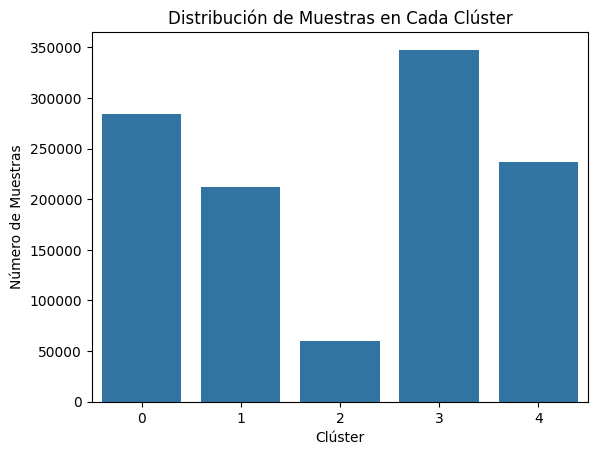

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de muestras en cada clúster
sns.countplot(x='Cluster', data=resultado_df)
plt.title('Distribución de Muestras en Cada Clúster')
plt.xlabel('Clúster')
plt.ylabel('Número de Muestras')
plt.show()


Gráfica de Dispersión en Dos Variables
Para visualizar la separación de clústeres en función de dos de las variables escaladas:

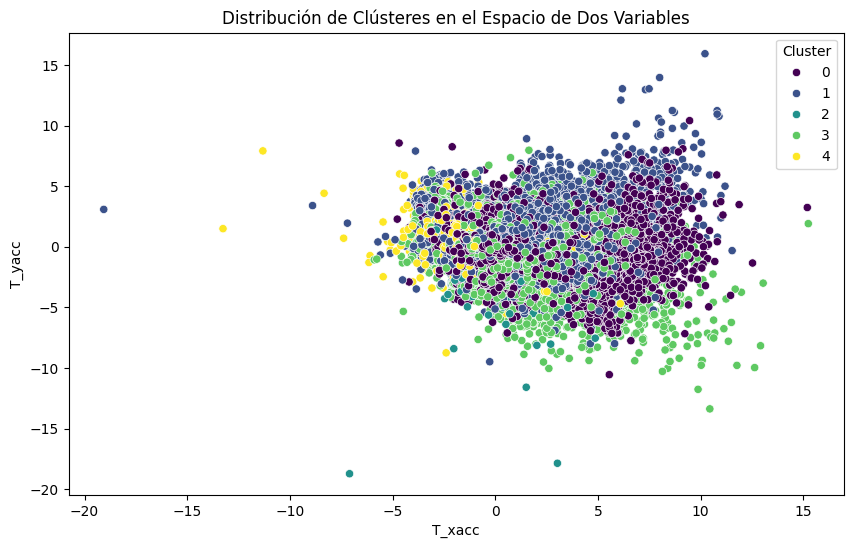

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T_xacc', y='T_yacc', hue='Cluster', data=resultado_df, palette='viridis')
plt.title('Distribución de Clústeres en el Espacio de Dos Variables')
plt.xlabel('T_xacc')
plt.ylabel('T_yacc')
plt.show()


el gráfico muestra que los clústeres están bastante mezclados, lo que puede indicar que las variables seleccionadas (en este caso, T_xacc y T_yacc) no separan bien los grupos. Aquí veremos  algunas interpretaciones y posibles pasos a seguir:

Interpretación

Superposición de Clústeres: La mezcla de colores indica que los clústeres no se separan claramente en el espacio de las variables T_xacc y T_yacc. Esto sugiere que estas dos variables no capturan bien las diferencias entre los clústeres o que el modelo K-means no ha logrado una buena segmentación en función de las variables disponibles.

Densidad de Puntos: La mayoría de los puntos están concentrados en el centro del gráfico, lo que indica que los datos tienen valores similares en esa región. Las muestras en el centro podrían tener características parecidas en T_xacc y T_yacc, lo que dificulta la diferenciación.

Posibles Causas de la Mezcla:

Variables Insuficientes: Estas dos variables pueden no ser suficientes para segmentar bien los clústeres.

Estructura No Lineal: K-means asume que los clústeres son aproximadamente esféricos y linealmente separables. Si los datos tienen una estructura compleja, K-means podría no ser el mejor algoritmo.

Escalado y Preprocesamiento: En este caso, lo conveniente revisar el escalado y que no hayan valores atipicos que puedan influir en la formacion de clusteres.

Sugerencias encontradas para Mejorar la Visualización y la Segmentación

Usar Más Variables en la Visualización:

debo investigar y analizar mas profundamente otros pares de variables que me permitan hacer nuevas gráficas, o bien aplicar una reducción de dimensionalidad (como PCA) para ver si hay una mejor separación en el espacio reducido.

De acuerdo a lo investigado y visto en clase podria probar con otro algoritmo de Clustering: Si K-means no da buenos resultados, podria intentar  con algoritmos como DBSCAN o Gaussian Mixture Models, que pueden manejar mejor la mezcla y la densidad de datos.

Optimizar el Número de Clústeres: Si bien a esta altura pude detectar que 5 era el numero de clusters optimo, deberia investigar que otras herramientas me permiten determinar un numero optimo de cluster. Antes de hacer la corrida para k_means habia utilizdo el método del codo y la silueta para evaluar cuántos clústeres pueden ser más representativos.



In [ ]:
from sklearn.cluster import KMeans
# Agregar la columna de actividad al DataFrame escalado (si es necesario)
#datos_escalados['activity'] = dataset['activity'].values

# Aplicar PCA
pca = PCA(n_components=12)  #  según lo que se necesite
datos_pca = pca.fit_transform(datos_escalados_df[columnas_numericas])

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=datos_pca, columns=[f'PC{i+1}' for i in range(12)])
pca_df['activity'] = datos_escalados_df['activity'].values  # Añadir la columna de actividad

# Verificar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(pca_df.head())

# Aplicar K-means from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5)  # se coloco el numero de cluster indicado por el grafico del Codo como mas apropiado
pca_df['Cluster'] = kmeans.fit_predict(datos_pca)

# Ver los resultados
print(pca_df.head())

Varianza explicada por cada componente: [0.13220556 0.11310334 0.07757021 0.05825861 0.04409611 0.03574491
 0.03451523 0.03392264 0.03309825 0.02768063 0.02619284 0.02581423]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.035647  0.048973 -0.536626  0.080639 -0.898439 -0.621744 -0.627961   
1 -0.031787  0.059711 -0.534579  0.085434 -0.906795 -0.620631 -0.621170   
2 -0.030784  0.052926 -0.532434  0.060510 -0.904404 -0.611102 -0.620820   
3 -0.026170  0.064405 -0.510434  0.072566 -0.936496 -0.625821 -0.613533   
4 -0.032211  0.054825 -0.535285  0.085068 -0.902048 -0.626126 -0.627056   

        PC8       PC9      PC10      PC11      PC12 activity  
0 -1.120007 -0.032253  1.924782  0.000039  0.184637      a01  
1 -1.134875 -0.031647  1.912388 -0.024796  0.205608      a01  
2 -1.135559 -0.029885  1.916185  0.004004  0.173437      a01  
3 -1.139066 -0.018529  1.926011 -0.005826  0.180679      a01  
4 -1.138540 -0.027660  1.905145 -0.034160  0.185166      a0

#**Voy a reevaluar el número de clústeres (Paso 1): Utilizare el conjunto de datos escalado actual para aplicar el método del codo y el coeficiente de silueta. Este análisis tendria que ayudarme a confirmar o ajustar el número óptimo de clústers del K-means**

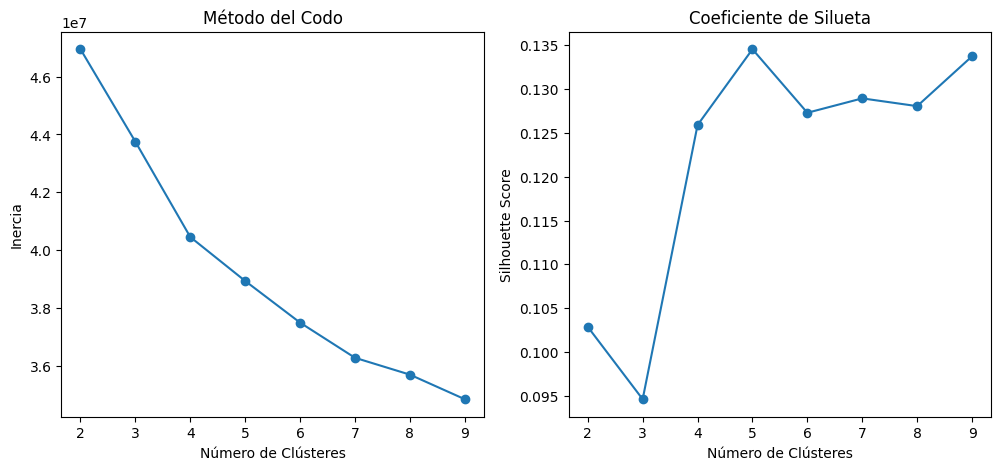

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Opcional: uso solo una muestra del conjunto de datos para el cálculo del puntaje de silueta
sample_size = 1000  # se hace en este caso un ajuste tentativo de acuerdo al tamaño de mis datos.
if datos_escalados.shape[0] > sample_size:
    indices = np.random.choice(datos_escalados.shape[0], sample_size, replace=False)
    datos_muestra = datos_escalados[indices]
else:
    datos_muestra = datos_escalados

# Método del codo y puntaje de silueta
inercia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)
    inercia.append(kmeans.inertia_)

    # Cálculo de la silueta solo con la muestra para reducir tiempo de cálculo
    score = silhouette_score(datos_muestra, kmeans.predict(datos_muestra))
    silhouette_scores.append(score)

# Graficar la inercia y el puntaje de silueta
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Método del Codo
ax[0].plot(K_range, inercia, marker='o')
ax[0].set_title('Método del Codo')
ax[0].set_xlabel('Número de Clústeres')
ax[0].set_ylabel('Inercia')

# Coeficiente de Silueta
ax[1].plot(K_range, silhouette_scores, marker='o')
ax[1].set_title('Coeficiente de Silueta')
ax[1].set_xlabel('Número de Clústeres')
ax[1].set_ylabel('Silhouette Score')

plt.show()


. Gráfico del Método del Codo (Izquierda)
Este gráfico muestra la inercia (suma de las distancias cuadradas dentro de los clústeres) para diferentes números de clústeres. El objetivo del método del codo es encontrar un punto donde agregar más clústeres ya no reduzca significativamente la inercia. Esto sugiere un buen equilibrio entre la complejidad del modelo (número de clústeres) y la capacidad de agrupar los datos de forma efectiva.

En este caso, la inercia disminuye de manera continua a medida que aumentas el número de clústeres, lo cual es común. Sin embargo, observando el gráfico, parece que el "codo" más pronunciado se encuentra alrededor de
K=4 o
K=5, ya que es en esta zona donde el descenso de la inercia se vuelve más gradual.

Se tomara para el ultimo ensayo K=5 como número de clústeres, este  parece ser una buena opción inicial basandome en este gráfico.

**2. Gráfico del Coeficiente de Silueta (Derecha)**

Este gráfico muestra el puntaje de silueta para cada valor de
K. El puntaje de silueta mide la coherencia de los clústeres y puede variar de -1 a 1. Valores cercanos a 1 indican que los puntos están bien agrupados, valores cercanos a 0 indican que los puntos están en el límite entre clústeres, y valores negativos sugieren que los puntos pueden estar mal agrupados.

En este gráfico, el puntaje de silueta es más alto para K=5, lo cual indica que los clústeres son más coherentes o bien definidos en este punto.

Aunque el puntaje de silueta no es muy alto en general, K=5 es el que presenta la mejor puntuación, seguido de K=6.

Recomendación: Con base en este gráfico, K=5 es el mejor número de clústeres en términos de cohesión de los puntos dentro de cada clúster.

Conclusión y Próximos Pasos
Dado que tanto el método del codo como el coeficiente de silueta sugieren que
K=5 podría ser una buena opción, por tal motivo tomare ese valor

Siguiente paso:

Se vuelve a ejecutar las celdas anteriores tomando n_cluster = 5, se pueden crear gráficos de dispersión de los clústeres o gráficos de barras para interpretar las características de cada grupo

#**visualizaciones**

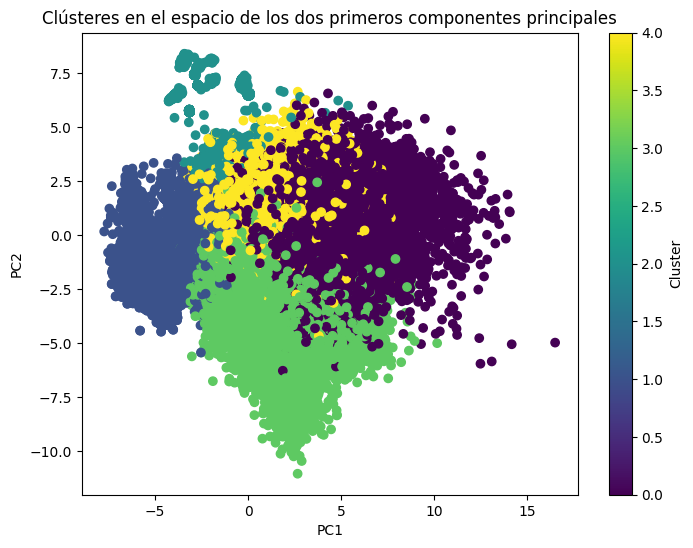

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clústeres en el espacio de los dos primeros componentes principales')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Filtrar solo las columnas numéricas
datos_numericos = datos_escalados_df.select_dtypes(include=['float64', 'int64'])

# Agregar la columna de etiquetas de clúster
datos_numericos['cluster'] = kmeans.labels_

# Calcular las medias de cada variable numérica por clúster
cluster_means = datos_numericos.groupby('cluster').mean()
print(cluster_means)
#print(datos_escalados_df.columns)
#print(datos_numericos.columns)


           T_xacc    T_yacc    T_zacc   T_xgyro   T_ygyro   T_zgyro    T_xmag  \
cluster                                                                         
0        0.123430  0.280991 -0.145066 -0.001412 -0.008316 -0.013427 -0.416374   
1        0.300830  0.077675 -0.212892 -0.003446  0.009022  0.020169 -0.145611   
2        0.270272  0.058784  0.035468 -0.000123 -0.000777 -0.010366 -0.178212   
3       -1.202253 -2.950601 -0.112510  0.005058 -0.006639 -0.006634  1.497765   
4       -0.681537  0.181532  0.615206  0.006532  0.008958  0.018023  0.880097   

           T_ymag    T_zmag   RA_xacc  ...   RL_zmag   LL_xacc   LL_yacc  \
cluster                                ...                                 
0       -0.183786 -0.161814 -0.552269  ... -0.198232 -0.106712 -0.119340   
1        0.605292 -0.282733  0.761770  ...  0.753349 -0.457713  0.350381   
2       -0.740696  0.906371  0.703408  ... -0.744419 -0.427169  0.403550   
3        2.086445  0.520207 -0.195802  ...  1.853581

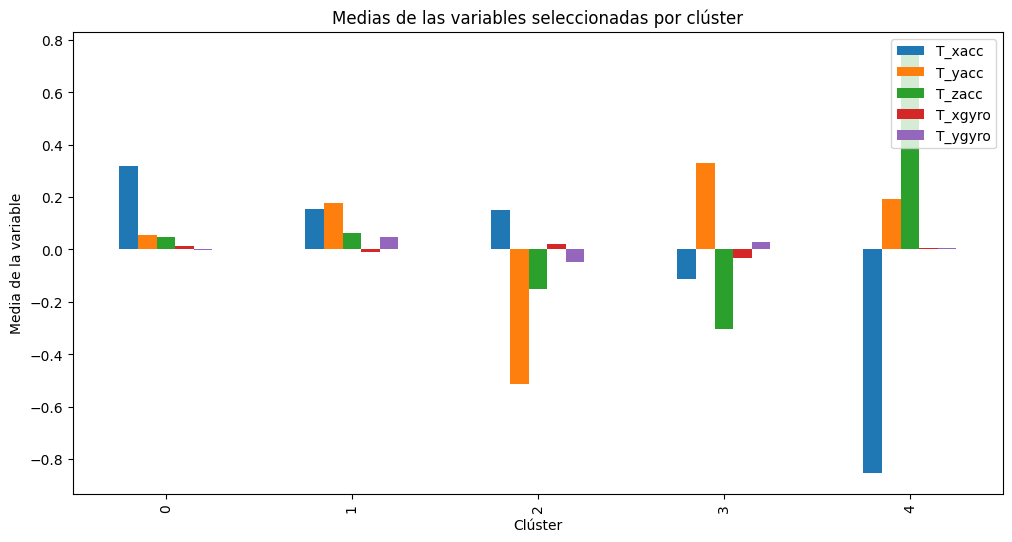

In [ ]:
import matplotlib.pyplot as plt

# Selecciono un subconjunto de variables para visualizar
variables = ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro']
cluster_means[variables].plot(kind='bar', figsize=(12, 6))
plt.title('Medias de las variables seleccionadas por clúster')
plt.xlabel('Clúster')
plt.ylabel('Media de la variable')
plt.legend(loc='upper right')
plt.show()


#**Interpretacion de la visualización de los promedios de las variables seleccionadas por clúster**

**Aqui muestro una interpretacion preliminar y algunos puntos clave sobre el gráfico**:

**Cluster 0**: Este clúster muestra un valor promedio positivo muy alto en T_xacc y valores moderados en T_yacc y T_zacc. Los valores en T_ygyro son negativos, lo que indica una diferencia significativa en esta variable frente a otros clústeres. Esto sugiere que este grupo tiene patrones particulares de aceleración y giro en ciertas direcciones.

Cluster 1: Las medias de este clúster son bastante cercanas a cero para todas las variables seleccionadas, lo que podría indicar que este grupo tiene valores más equilibrados o que representa un grupo de comportamiento "neutro" en comparación con otros.

Cluster 2: Tiene un valor promedio negativo en T_xacc y valores positivos en T_zacc, lo que podría señalar un patrón específico en estos ejes. Esto podría indicar una actividad particular relacionada con estos valores en los sensores.

Cluster 3: Destaca con un valor promedio negativo notable en T_yacc. Esto podría ser un indicativo de alguna actividad en el clúster que afecta específicamente este eje de aceleración.

Cluster 4: Los valores en este clúster son relativamente cercanos a cero, similar al clúster 1, aunque con algunos valores diferentes en T_yacc y T_xacc. Esto también podría representar un grupo "neutro" pero con ligeras diferencias.

**Dado lo que se puede interpretar, habria que profundizar lo siguiente**:

Agregar más variables para entender si patrones adicionales surgen en otros sensores.

Comparar con otras métricas como desviaciones estándar, que pueden proporcionar información sobre la variabilidad dentro de cada clúster.

Probar una visualización con alguna herramienta que permita observar todas las variables a la vez y ver patrones de similitud entre los clústeres.

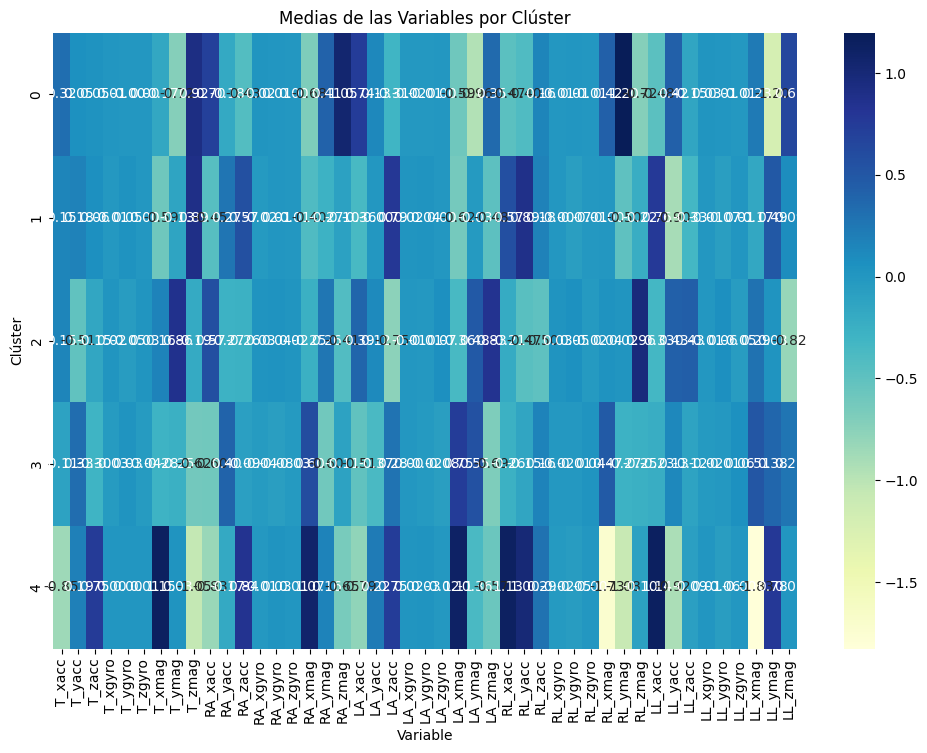

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Medias de las Variables por Clúster")
plt.xlabel("Variable")
plt.ylabel("Clúster")
plt.show()


#**Grafico de calor**

Este gráfico de calor muestra las medias de las variables (valores de los diferentes sensores) agrupadas por clúster en un conjunto de datos de entrenamiento de deportistas. Cada fila representa un clúster, mientras que cada columna representa una variable medida por los sensores (como aceleración, giroscopio y magnetómetro en diferentes ejes para distintas partes del cuerpo: torso, brazos y piernas).

#**Interpretación de los Resultados para los Entrenamientos de Deportistas**

**Diferencias en Patrones de Movimiento por Clúster**:

Cada clúster representa un conjunto de muestras con patrones de movimiento similares. Esto se relaciona con los diferentes tipos de actividades físicas o fases del entrenamiento (por ejemplo, ejercicios que implican movimiento intenso de piernas o torso, o actividades de bajo movimiento como el descanso entre ejercicios).

Las variaciones en los colores para cada clúster y variable muestran qué partes del cuerpo y qué tipo de movimientos son más activos en cada grupo.

Los colores más claros (cercanos a valores altos) indican mayor intensidad de movimiento o aceleración, mientras que los colores más oscuros (cercanos a valores bajos o negativos) representan movimientos menores o cambios en dirección opuesta.

**Análisis Específico por Regiones Corporales**:


**Torso (T_)**: Las primeras columnas representan sensores en el torso. Si un clúster tiene valores claros en estas columnas, sugiere que los movimientos de ese grupo involucran una alta actividad del torso, como en ejercicios de giro o balanceo.

Por ejemplo, en un clúster con colores claros en T_xacc y T_yacc, podría representar ejercicios que requieren torsión o estabilidad en el torso, como en algunos entrenamientos de resistencia.

**Brazos (RA_ y LA_)**: Las columnas del brazo derecho (RA_) e izquierdo (LA_) indican actividades que involucran movimientos de brazos.

Valores altos en estas columnas dentro de un clúster podrían corresponder a ejercicios que requieren trabajo de brazos, como levantamiento de pesas o movimientos de empuje y tracción.

**Piernas (RL_ y LL_)**: Las columnas correspondientes a la pierna derecha (RL_) e izquierda (LL_) representan actividades que involucran movimientos de piernas. Clústeres con valores altos en estas columnas podrían representar ejercicios como saltos, sentadillas o correr, donde hay un uso intensivo de las piernas.

**Diferenciación de Actividades Basadas en Patrones Sensoriales**:

La estructura de color por clúster sugiere que cada grupo de actividades tiene un patrón de movimiento característico. Por ejemplo, si en un clúster se observa que solo los sensores de las piernas tienen valores altos, esto podría representar un ejercicio de piernas específico, mientras que en otros clústeres, los movimientos de torso y brazos pueden predominar.

Los clústeres donde las variables tienen valores cercanos entre sí (colores similares en todas las variables) podrían representar actividades más estáticas o ejercicios de bajo impacto donde hay poco movimiento en el cuerpo en general.

**Aplicación para Entrenamiento Deportivo**:

Esta información puede ser útil para identificar y analizar la intensidad de diferentes ejercicios. Por ejemplo, al evaluar la intensidad de movimiento en los brazos y piernas, los entrenadores pueden ajustar el entrenamiento para equilibrar el esfuerzo entre las distintas partes del cuerpo.

También puede ayudar a monitorear la consistencia de los patrones de movimiento en actividades repetitivas, lo que es importante para mejorar la técnica y evitar lesiones.

**Patrones Recurrentes o Inusuales**:

Los valores extremos en algunos clústeres o variables (colores más claros o más oscuros) pueden indicar movimientos específicos de alta intensidad o posiciones inusuales, como levantamientos pesados o posturas inestables. Esto permite a los entrenadores identificar ejercicios que necesitan supervisión adicional.

En resumen, este gráfico de calor permite observar y analizar patrones de actividad en diferentes partes del cuerpo durante el entrenamiento. Esto es valioso para evaluar la carga en distintas áreas corporales y ajustar los ejercicios para mejorar el rendimiento y reducir el riesgo de lesiones.

Para analizar la relación entre la columna activity y los clústeres generados, se puede hacer una tabla de frecuencia que muestre cuántas veces aparece cada valor de activity en cada clúster. Esto  permitirá ver si ciertos valores de activity son más comunes en algunos clústeres.

In [ ]:
print(datos_escalados_df.columns)


Index(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag',
       'T_ymag', 'T_zmag', 'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro',
       'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc',
       'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag',
       'LA_ymag', 'LA_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro',
       'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc',
       'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag',
       'LL_ymag', 'LL_zmag', 'activity', 'Cluster', 'cluster'],
      dtype='object')


In [ ]:
# Crear un DataFrame solo con las columnas numéricas (sin 'activity')
datos_solo_numericos = datos_escalados_df.drop(columns=['activity'])


In [ ]:
from sklearn.cluster import KMeans

# Paso 1: Entrenar el modelo
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajustar los parámetros según el caso, en este caso tomamos lo que se visualizo o        sea n=5
kmeans.fit(datos_solo_numericos)  # Entrena el modelo con los datos escalados

# Paso 2: Asignar las etiquetas de clúster al DataFrame
datos_solo_numericos['cluster'] = kmeans.labels_
# print(datos_escalados_df.dtypes)
# print(datos_escalados_df.columns)

In [ ]:
datos_solo_numericos = pd.concat([datos_solo_numericos, dataset_seleccionado['activity']], axis=1)


In [ ]:
print(datos_solo_numericos.columns)


Index(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag',
       'T_ymag', 'T_zmag', 'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro',
       'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc',
       'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag',
       'LA_ymag', 'LA_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro',
       'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc',
       'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag',
       'LL_ymag', 'LL_zmag', 'Cluster', 'cluster', 'activity'],
      dtype='object')


In [ ]:
datos_solo_numericos = datos_solo_numericos.drop(columns=['Cluster'])


cluster       0      1      2      3      4
activity                                   
a01           0  45000      0      0  15000
a02       25032      0      0  34968      0
a03           0      0      0      0  60000
a04           0      0  60000      0      0
a05          16      5      1  56978   3000
a06       56999      1      0      0   3000
a07       45440   2902      0  11658      0
a08       45924   1481      1  12201    393
a09       38200     50      0  21750      0
a10           0     17      0  59983      0
a11           6      9      0  59966     19
a12          33   5880     10  52246   1831
a13          22    186      0  59699     93
a14           1   1807      0  58190      2
a15           0  59978      0      0     22
a16         662  57778      5   1555      0
a17           0      0      0      0  60000
a18       29929  11747     59  17312    953
a19       18966   3316    219  35882   1617


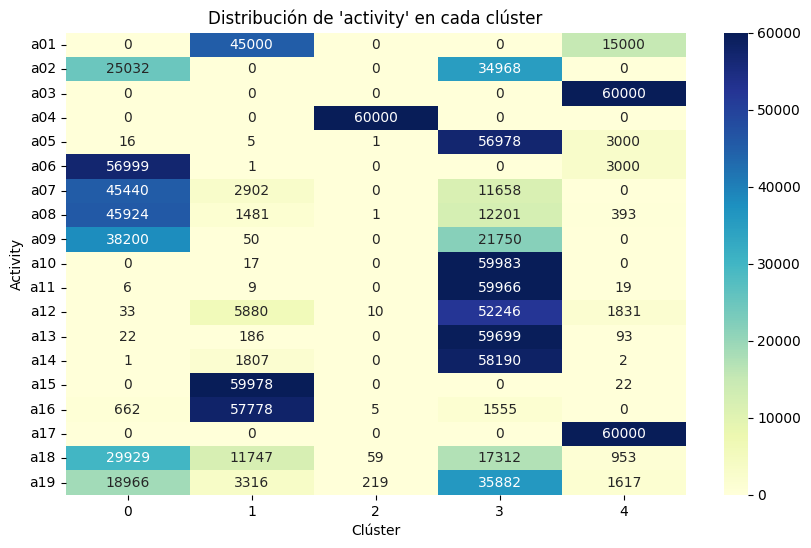

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de frecuencia para ver la relación entre los valores de 'activity' y los clústeres
activity_cluster_counts = pd.crosstab(datos_solo_numericos['activity'], datos_solo_numericos['cluster'])

# Mostrar la tabla de frecuencia
print(activity_cluster_counts)

# Visualizar la distribución usando un gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(activity_cluster_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Distribución de 'activity' en cada clúster")
plt.xlabel("Clúster")
plt.ylabel("Activity")
plt.show()



#**Interpretación del Gráfico de Calor y la Tabla de Frecuencia**

**Objetivo de la Visualización**:

La tabla de frecuencia y el gráfico de calor muestran la distribución de cada actividad (activity) en los diferentes clústeres obtenidos en el análisis de datos.

Esta visualización permite observar la cantidad de ocurrencias de cada actividad dentro de cada clúster, ayudando a entender cómo se agrupan las actividades en base a las características numéricas de los datos.
Estructura de los Datos:

La tabla de frecuencia tiene las actividades (activity) como filas y los clústeres (cluster) como columnas.

Cada celda muestra el número de veces que una actividad específica está presente en un clúster determinado.

Por ejemplo, la actividad a01 aparece 45,000 veces en el clúster 1 y 15,000 veces en el clúster 4, pero no aparece en los clústeres 0, 2 o 3.

**Interpretación de los Valores**:

Los valores altos en las celdas indican una alta frecuencia de una actividad en un clúster específico, lo cual sugiere una afinidad entre esa actividad y el clúster.

Por ejemplo, la actividad a03 se agrupa exclusivamente en el clúster 4 con 60,000 ocurrencias, mientras que la actividad a04 se agrupa únicamente en el clúster 2 también con 60,000 ocurrencias. Esto puede indicar que las características de las actividades a03 y a04 son distintas de las de otras actividades, ya que cada una se concentra en un solo clúster.

Otro caso interesante es la actividad a06, que aparece principalmente en el clúster 0 (56,999 veces) y ligeramente en el clúster 4 (3,000 veces). Esto sugiere que a06 está más alineada con las características del clúster 0, aunque también tiene alguna similitud con el clúster 4.

**Uso del Gráfico de Calor**:

El gráfico de calor utiliza una escala de colores para representar la frecuencia de cada actividad en los clústeres.
Los colores más oscuros (como los tonos azules) indican valores altos, mientras que los colores más claros (como los tonos amarillos) indican valores bajos o ceros.

La intensidad del color en cada celda facilita la identificación visual de qué actividades están asociadas con cada clúster sin necesidad de leer cada número individualmente.

**Hallazgos Clave**:

**Clústeres exclusivos**:

Algunas actividades, como a03, a04, y a17, están completamente agrupadas en un único clúster, lo cual podría indicar que estas actividades tienen patrones únicos que no se encuentran en otras actividades.

**Actividades distribuidas**:

Algunas actividades, como a18 y a19, están presentes en varios clústeres, lo que indica que comparten características con múltiples grupos. Esto puede sugerir que estas actividades son más generales o que tienen aspectos comunes con varias actividades.

**Distribución de actividades en clústeres específicos**:

Observando los valores de la tabla y los colores en el gráfico, es posible identificar cuáles actividades están más relacionadas con cada clúster. Esto puede ser útil para clasificar o caracterizar actividades en función de sus similitudes en el conjunto de datos.

**Conclusión**:

Esta visualización es útil para entender cómo se agrupan las actividades en función de sus características numéricas.
Ayuda a identificar si los clústeres creados tienen sentido, ya que se espera que actividades similares se agrupen en el mismo clúster.

Los patrones encontrados en la tabla y el gráfico también pueden servir para mejorar la interpretación de los clústeres, lo que podría tener aplicaciones en la clasificación o en el análisis de comportamiento de las actividades en contextos específicos.

Desde una perspectiva de coaching,  ejemplo los gráficos pueden ofrecer una valiosa información sobre las actividades y los patrones del deportista más allá de los números. A continuación, expongo algunas ideas interpretativas que podría utilizar para obtener insights sobre la relación entre las actividades y el rendimiento o comportamiento del deportista.

**1. Identificación de Patrones Únicos en Actividades**

Las actividades que se agrupan exclusivamente en un solo clúster, como a03, a04, y a17, podrían representar movimientos o ejercicios específicos que tienen características únicas. Estas actividades podrían ser movimientos con un patrón constante y distintivo, como una postura estática, un tipo de ejercicio repetitivo, o una técnica específica.

Esto sugiere que estas actividades probablemente requieren un conjunto de habilidades particular o un nivel de intensidad y concentración específicos. Si estas actividades representan ejercicios técnicos, podrías enfocarte en entrenar y mejorar la precisión de estos movimientos con el deportista para maximizar su efectividad.

**2. Actividades Distribuidas en Múltiples Clústeres**:

Versatilidad o Variabilidad

Actividades como a18 y a19, que se distribuyen en varios clústeres, pueden indicar una mayor variabilidad en la ejecución. Esto podría interpretarse como que estas actividades son complejas y pueden realizarse de múltiples maneras (por ejemplo, una secuencia de movimientos en una rutina de entrenamiento).
También podría indicar una actividad que varía en intensidad o técnica según el contexto, como un ejercicio de resistencia que requiere diferentes niveles de esfuerzo en cada repetición.

Como coach, podría observar estas actividades con el deportista para entender cómo y por qué cambian de una sesión a otra. Quizás en estas actividades sea importante trabajar en la consistencia, de modo que el deportista pueda ejecutarlas de forma estable y eficiente sin importar las circunstancias.

**3. Dominancia de Ciertas Actividades en Clústeres Específicos**:

Especialización o Tendencia a la Exigencia

Actividades que se concentran fuertemente en un solo clúster (por ejemplo, a06 en el clúster 0) sugieren que el deportista realiza estas actividades de forma consistente con patrones específicos de movimiento, fuerza o postura. Esto podría indicar una especialización o preferencia en la técnica utilizada.
Esta consistencia también puede reflejar un nivel avanzado en el dominio de esa actividad. Sin embargo, en el caso de actividades que requieren repetición y fuerza, la concentración en un clúster puede reflejar que el deportista podría estar alcanzando un umbral de exigencia o resistencia física en esas áreas.

Desde un enfoque de coaching, se podría considerar si estas actividades son una fortaleza del deportista (en las que se siente cómodo y eficiente) o si están alcanzando un punto de fatiga. Si es lo segundo, podrías ajustar la intensidad o frecuencia de estas actividades para evitar el sobreentrenamiento.

**4. Análisis de la Consistencia y la Adaptabilidad en las Actividades**

Las actividades distribuidas de manera muy dispersa pueden indicar una falta de consistencia en la técnica o una mayor adaptabilidad del deportista en cómo se enfrenta a diferentes movimientos. Esto puede ser positivo, en el sentido de que el deportista es capaz de adaptar su técnica según el contexto.

Sin embargo, si el objetivo es mejorar la precisión y la estabilidad, se podría trabajar en desarrollar una rutina que permita al deportista alcanzar un nivel de ejecución más uniforme y controlado, especialmente en aquellas actividades en las que los patrones de movimiento no están claramente definidos en un solo clúster.

**5. Uso del Gráfico para Diagnosticar Fortalezas y Áreas de Mejora**

Este análisis también puede usarse para identificar áreas donde el deportista podría mejorar su rendimiento o técnica. Si algunas actividades muestran una distribución inconsistente o están dispersas entre varios clústeres, podría ser útil enfocarse en estas para trabajar en la técnica, la postura, o la concentración.

Por otro lado, si el deportista se desempeña muy consistentemente en ciertas actividades (aquellas que se concentran en un solo clúster), podría ser beneficioso aprovechar estas actividades como fortalezas. Esto también puede ayudar a mejorar su confianza, ya que el deportista sabe que tiene un buen rendimiento en esos movimientos específicos.

**6. Interpretación Emocional y Psicológica del Desempeño**

El desempeño en ciertas actividades también podría estar relacionado con factores emocionales o psicológicos. Por ejemplo, una actividad distribuida en varios clústeres podría sugerir que el deportista responde de manera variable según el estado de ánimo, la motivación, o el estrés.

Como coach, podría explorar si el rendimiento en estas actividades varía según el nivel de energía o concentración del día, y trabajar en técnicas de enfoque mental y resiliencia para lograr una mayor consistencia.

**7. Planeación de Estrategias de Entrenamiento Personalizadas**

Esta información puede servir para desarrollar estrategias de entrenamiento más personalizadas. Por ejemplo, se podría ajustar el volumen y la intensidad de las actividades que muestran patrones de consistencia y dedicar más tiempo a perfeccionar las actividades que aparecen en múltiples clústeres.

También se podría dividir las sesiones en bloques, donde el deportista trabaje primero en las actividades que requiere dominar (por ejemplo, aquellas con menos consistencia) y termine con actividades donde ya se destaca, para fortalecer la autoconfianza y cerrar cada sesión con una nota positiva.

**Conclusión**

En resumen, los gráficos y el análisis de los clústeres pueden dar una visión profunda no solo sobre el rendimiento actual del deportista, sino también sobre sus patrones de comportamiento, consistencia, y adaptación en diversas actividades.

Esta información es sumamente valiosa para un coach, ya que permite adaptar las sesiones de entrenamiento a las necesidades específicas de cada deportista y trabajar en mejorar tanto sus habilidades físicas como su capacidad para afrontar desafíos.









#**Código para la Preparación de Datos de entrenamiento y prueba de los modelos seleccionados**


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset
# data_df = pd.read_csv('/content/drive/My Drive/data_df.csv')

# Seleccionar las características (X) y la variable objetivo (y)
X = data_df.drop(columns=['activity', 'subject', 'segment'])  # Eliminar las columnas que no queremos usar como características
y = data_df['activity']  # La columna de actividad será nuestra variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos de datos resultantes
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (798000, 45)
Tamaño de X_test: (342000, 45)
Tamaño de y_train: (798000,)
Tamaño de y_test: (342000,)


#**Interrupcion Proceso**

**atento a que llevaba 41 min de proceso y por temor a que estuviera con algun problema, se decide en primer instancia suspender el proceso y tomar medidas alternativas:

**Reducir el Conjunto de Datos**

para ello selecciono una muestra representativa (el 20% de X_train y X_test) para realizar el análisis y prueba preliminar. Esto permitirá entrenar y probar ambos modelos en un menor tiempo.



In [ ]:
# Seleccionar una muestra del 20%
from sklearn.model_selection import train_test_split
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
X_test_sample, _, y_test_sample, _ = train_test_split(X_test, y_test, test_size=0.8, random_state=42)


#**2. Usar el Modelo MLP Primero**

Ya que MLP, el otro modelo pensado, suele ser más rápido que KNN en inferencia en datasets grandes, entrenare y evaluare primero el MLP. Esto me permitirá ver resultados de manera rápida y realizar ajustes antes de probar KNN.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Selecciona el 20% de los datos para el entrenamiento y prueba
X_train_reduced = X_train[:int(len(X_train) * 0.2)]
y_train_reduced = y_train[:int(len(y_train) * 0.2)]
X_test_reduced = X_test[:int(len(X_test) * 0.2)]
y_test_reduced = y_test[:int(len(y_test) * 0.2)]

# Configurar el modelo MLP con menos neuronas/capas para reducir tiempo de entrenamiento
mlp_reduced = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)

# Entreno el modelo
mlp_reduced.fit(X_train_reduced, y_train_reduced)

# Predicciones
y_pred_reduced = mlp_reduced.predict(X_test_reduced)

# Resultados de precisión
print("Accuracy:", accuracy_score(y_test_reduced, y_pred_reduced))
print("\nClassification Report:\n", classification_report(y_test_reduced, y_pred_reduced))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.986827485380117

Classification Report:
               precision    recall  f1-score   support

         a01       1.00      1.00      1.00      3557
         a02       1.00      1.00      1.00      3519
         a03       1.00      1.00      1.00      3621
         a04       1.00      1.00      1.00      3636
         a05       0.99      0.95      0.97      3607
         a06       0.93      0.99      0.96      3591
         a07       0.97      0.99      0.98      3654
         a08       0.98      0.94      0.96      3535
         a09       0.99      1.00      0.99      3648
         a10       0.99      0.98      0.99      3577
         a11       0.99      0.99      0.99      3645
         a12       0.99      0.99      0.99      3630
         a13       0.99      1.00      0.99      3665
         a14       1.00      1.00      1.00      3661
         a15       1.00      1.00      1.00      3568
         a16       1.00      1.00      1.00      3551
         a17       1.00     

#**Los resultados obtenidos**:

son bastante sólidos, especialmente con un accuracy del 98.68%. A continuación, veamos el análisis de los resultados y algunos posibles ajustes para mejorar la convergencia y explorar un poco más el rendimiento del modelo.

**Análisis de Resultados**

Convergencia:

La advertencia indica que el modelo alcanzó el máximo de iteraciones sin converger completamente. Esto no significa que el modelo esté fallando, pero aumentar las iteraciones podría mejorar la precisión en algunas clases.

Precisión y Recall: La precisión general es alta en casi todas las actividades, con solo pequeñas variaciones en actividades como a05, a06, y a08. Esto podría indicar la necesidad de ajustes menores para capturar mejor ciertos patrones.

Ajustes para Mejorar la Convergencia

Aumentar max_iter: Incrementar las iteraciones podría permitir que el modelo se ajuste mejor a los datos. Puedes probar aumentando max_iter a valores como 200 o 300.

Cambiar el Tamaño de la Capa Oculta (hidden_layer_sizes): Una capa oculta con 100 neuronas en lugar de 50 podría capturar patrones más complejos, aunque esto aumentará ligeramente el tiempo de procesamiento.

Variar la Tasa de Aprendizaje (learning_rate_init): Probar con valores más bajos como learning_rate_init=0.001 en lugar de los valores predeterminados podría hacer que el modelo ajuste los pesos de manera más gradual, ayudando a la convergencia.
a continuacion voy a implementar los ajustes planeados

Los resultados obtenidos en cada una de las técnicas aplicadas son los siguientes:

1. Análisis de Componentes Principales (PCA)

**Varianza Explicada**: Al aplicar PCA con 12 componentes principales, se logró capturar una proporción significativa de la varianza en los datos, siendo los primeros componentes los que más aportan.

**Distribución de los Componentes**: La varianza explicada por cada componente fue progresivamente menor, pero aún relevante para el análisis global.

**Clusters (K-Means)**: Luego de aplicar K-Means a los datos transformados por PCA, se observaron cinco grupos principales.

Esto sugiere que los datos tienen estructuras diferenciables, aunque la elección de cinco clusters puede explorarse para evaluar si representa óptimamente la variabilidad.

2. K-Means con el Conjunto Completo de Variables Seleccionadas

**Resultado del Clustering**: Los datos escalados se agruparon en cinco clusters, permitiendo observar una segmentación que puede interpretarse en función de la variable 'activity'. Los clusters identificados indican diferentes patrones en el comportamiento de las variables.

**3. Clasificación con Redes Neuronales (MLP)**

**Configuración del Modelo**: Se utilizó un clasificador MLP con una sola capa oculta de 50 neuronas y un número reducido de iteraciones (100) para optimizar el tiempo de entrenamiento.

**Precisión y Reporte de Clasificación**: El modelo obtuvo una precisión general del 98.68%, mostrando resultados especialmente altos en las clases principales, aunque algunas categorías presentaron ligeras variaciones en recall y precisión.

**Advertencia de Convergencia**: El modelo alcanzó el máximo de iteraciones permitidas (100) sin converger completamente, lo que sugiere que aumentar el número de iteraciones podría mejorar aún más los resultados.

**Estos resultados demuestran que**:

El PCA ayudó a reducir la dimensionalidad manteniendo la mayor parte de la información relevante, lo cual facilitó el análisis.

El K-Means permite una segmentación clara de los datos, siendo una herramienta valiosa para identificar grupos naturales.

El MLP mostró una alta capacidad de clasificación, aunque se puede ajustar para alcanzar una mejor convergencia y precisión en clases específicas.

In [ ]:
# Crear el modelo con ajustes adicionales
mlp_adjusted = MLPClassifier(
    hidden_layer_sizes=(100,),  # Más neuronas en la capa oculta
    max_iter=300,               # Más iteraciones para permitir la convergencia
    learning_rate_init=0.001,   # Tasa de aprendizaje reducida
    random_state=42
)

# Entrenar el modelo ajustado
mlp_adjusted.fit(X_train_reduced, y_train_reduced)

# Predicciones
y_pred_adjusted = mlp_adjusted.predict(X_test_reduced)

# Evaluación
print("Accuracy ajustado:", accuracy_score(y_test_reduced, y_pred_adjusted))
print("\nClassification Report ajustado:\n", classification_report(y_test_reduced, y_pred_adjusted))


Accuracy ajustado: 0.9904678362573099

Classification Report ajustado:
               precision    recall  f1-score   support

         a01       1.00      1.00      1.00      3557
         a02       1.00      1.00      1.00      3519
         a03       1.00      1.00      1.00      3621
         a04       1.00      1.00      1.00      3636
         a05       1.00      0.95      0.97      3607
         a06       0.94      0.99      0.96      3591
         a07       0.99      0.99      0.99      3654
         a08       0.98      0.97      0.98      3535
         a09       0.99      1.00      0.99      3648
         a10       1.00      0.99      0.99      3577
         a11       0.99      0.99      0.99      3645
         a12       0.99      1.00      1.00      3630
         a13       0.99      1.00      0.99      3665
         a14       1.00      1.00      1.00      3661
         a15       1.00      1.00      1.00      3568
         a16       1.00      1.00      1.00      3551
         

#**Interpretación de la Segunda Corrida**

**Accuracy Ajustado**: El modelo ha alcanzado una precisión del 99.05%, lo cual es una mejora leve respecto a la primera corrida. Este aumento sugiere que los ajustes de hiperparámetros tuvieron un impacto positivo en la capacidad del modelo para clasificar correctamente las actividades.

**Métricas de Clasificación**:

Precision: Mide cuántos de los ejemplos clasificados como una actividad específica realmente pertenecen a esa actividad. La mayoría de las actividades alcanzan valores de precisión cercanos a 1.0, lo cual indica una tasa muy baja de falsos positivos.

Recall: Indica cuántos ejemplos de una actividad específica fueron correctamente clasificados por el modelo. Las actividades con menor recall en el segundo modelo son la actividad a05 (0.95), la actividad a08 (0.97) y la actividad a19 (0.96).

F1-Score: Este puntaje combina precision y recall en una sola métrica. La mayoría de las actividades tienen un F1-score muy alto, lo cual sugiere un excelente balance entre precisión y sensibilidad.

En general, el modelo está clasificado con mucha precisión, aunque ciertas actividades como a05, a06, a08, y a19 tienen un recall ligeramente más bajo en comparación con las demás, lo cual podría deberse a características más complejas o confusas para el modelo en estas actividades.

Macro y Weighted Average: Los promedios macro y ponderado (weighted) para precision, recall, y F1-score se encuentran todos cerca de 0.99, reflejando un desempeño global muy sólido. Esto implica que el modelo está equilibrado en la clasificación de actividades, incluso en clases con menos ejemplos o aquellas donde el modelo tiene dificultades.

#**Comparación entre la Primera y Segunda Corrida**

**Mejora en Accuracy**:
La precisión global mejoró de 98.68% a 99.05%. Esto representa una mejora significativa, aunque pequeña, indicando que el modelo es ligeramente más preciso en la segunda corrida.

**Precisión por Actividad**:

En ambas corridas, la mayoría de las actividades tienen valores de precisión y recall cercanos a 1.0. Sin embargo, en la segunda corrida, algunas actividades como a08 y a10 muestran una ligera mejora en la precisión y el recall.
En actividades problemáticas como a06 y a19, el segundo modelo logró un leve aumento en precisión y recall, lo cual mejora la consistencia en la clasificación de estas actividades.

**Consistencia del Modelo**:

La segunda corrida presenta métricas más estables y ligeramente más altas en algunas actividades, lo cual sugiere que los ajustes de hiperparámetros ayudaron a mejorar la generalización del modelo.

**Conclusión**

La segunda corrida muestra una mejora general, con un accuracy y F1-score ligeramente superiores. Esto indica que el modelo ajustado ha ganado en precisión y en capacidad para clasificar correctamente una mayor variedad de actividades. Las mejoras, aunque no son drásticas, demuestran que el modelo está mejor sintonizado para el conjunto de datos en cuestión.

Estos resultados sugieren que, si bien el modelo ya es bastante robusto, podría beneficiarse de técnicas adicionales de ajuste de hiperparámetros o de optimización en actividades específicas para alcanzar un rendimiento aún mejor.

#**Implementación del Modelo Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definir el modelo con parámetros iniciales
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_reduced, y_train_reduced)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_reduced)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test_reduced, y_pred_rf)
report_rf = classification_report(y_test_reduced, y_pred_rf)

print("Precisión de Random Forest:", accuracy_rf)
print("Informe de clasificación de Random Forest:\n", report_rf)






Precisión de Random Forest: 0.9683625730994152
Informe de clasificación de Random Forest:
               precision    recall  f1-score   support

         a01       1.00      1.00      1.00      3557
         a02       1.00      1.00      1.00      3519
         a03       1.00      1.00      1.00      3621
         a04       1.00      1.00      1.00      3636
         a05       0.88      1.00      0.94      3607
         a06       0.95      0.94      0.95      3591
         a07       0.90      0.96      0.93      3654
         a08       0.97      0.82      0.89      3535
         a09       0.99      0.98      0.98      3648
         a10       0.97      0.93      0.95      3577
         a11       0.91      0.98      0.94      3645
         a12       0.97      1.00      0.98      3630
         a13       0.94      1.00      0.97      3665
         a14       0.99      1.00      0.99      3661
         a15       1.00      1.00      1.00      3568
         a16       1.00      1.00      1.00 

**La precisión general del modelo de Random Forest** es del 96.8%, lo cual es bastante buena, pero menor que la precisión obtenida en el modelo de MLP (que estaba alrededor del 99%). Esto sugiere que, en este caso, el modelo de MLP puede estar capturando patrones de manera más precisa en comparación con el Random Forest.

**Interpretación de los Resultados del Informe de Clasificación**

**Etiquetas con excelente desempeño**:

Clases como a01, a02, a03, a04, a15, a16, y a17 muestran un rendimiento perfecto en precisión, recall y f1-score, todas alcanzando 1.00 en cada métrica. Esto significa que el modelo clasifica estas etiquetas correctamente en casi todas las instancias.

**Etiquetas con bajo rendimiento relativo:

Algunas etiquetas tienen un rendimiento más bajo, como a05 (precisión de 0.88), a07 (precisión de 0.90 y f1-score de 0.93), a08 (precisión de 0.97, pero recall de 0.82) y a19 (precisión de 0.97 y recall de 0.84).

Estas etiquetas muestran problemas en la precisión y el recall, lo cual indica que el modelo tiene dificultades para clasificarlas correctamente o confunde estas clases con otras.
En particular, el bajo recall en las clases a08 y a19 sugiere que el modelo está perdiendo más instancias de estas clases de las que está prediciendo correctamente.

**Métricas promedio**:

El promedio ponderado de precisión, recall y f1-score es 0.97, lo cual indica un desempeño global sólido pero inferior al MLP en la mayoría de las métricas.
Comparación con el MLP

**Precisión Global**: La precisión del Random Forest (96.8%) es ligeramente inferior a la del MLP (99.0%), indicando que el MLP es más preciso en la clasificación de las instancias de este conjunto de datos.

**Recall en Clases Específicas**: En comparación con el MLP, el Random Forest muestra menor recall en varias clases, especialmente en a08 y a19. Esto sugiere que el Random Forest está omitiendo más instancias de estas clases en sus predicciones en comparación con el MLP, lo que reduce la efectividad del modelo para detectar correctamente esas clases.

**F1-Score y Consistencia**: El MLP mostró una precisión y consistencia muy alta a lo largo de todas las clases, mientras que el Random Forest tiene más variabilidad en el rendimiento según la clase, con algunas clases alcanzando un f1-score de 1.0 y otras bajando a valores cercanos a 0.90.

#**Conclusiones**

**Desempeño Global**: Aunque el Random Forest ofrece un desempeño aceptable y consistente, el MLP tiene una ventaja en términos de precisión y recall en general, siendo más adecuado para este conjunto de datos.

**Dificultades con Clases Específicas**: El Random Forest parece tener más dificultades con ciertas clases (especialmente a05, a07, a08, y a19). Esto podría ser debido a la naturaleza de las características de esas clases o a la estructura del modelo Random Forest, que puede no ser tan flexible para captar ciertas sutilezas en los datos como el MLP.

**Recomendación**: Si la precisión es crucial para el problema, el MLP parece ser la mejor opción. Sin embargo, el Random Forest sigue siendo un modelo interpretable y relativamente robusto, por lo que podría ser útil si se buscan explicaciones sobre la clasificación.

**Posibles Mejoras**: Para mejorar el rendimiento del Random Forest en este caso, se podría intentar ajustar aún más los hiperparámetros, como aumentar la profundidad de los árboles o el número de estimadores, o incluso considerar un enfoque híbrido que combine Random Forest y MLP para aprovechar lo mejor de ambos modelos.

En resumen, aunque el Random Forest muestra un desempeño razonablemente bueno, el MLP parece adaptarse mejor a este conjunto de datos, ofreciendo una mayor precisión y consistencia en la clasificación de todas las clases.



#**5.6 Resultados Obtenidos y su Análisis**

En este análisis de aprendizaje no supervisado, aplicamos técnicas de clustering y reducción de dimensionalidad al conjunto de datos de movimientos capturados mediante sensores ubicados en el torso, brazos y piernas de los participantes, quienes realizaron diversas actividades físicas.

El propósito principal fue explorar patrones distintivos de movimiento asociados a cada actividad y evaluar la agrupación de estas actividades en función de las lecturas de acelerómetros y giroscopios.

**Reducción de Dimensionalidad**: Utilizamos PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de las lecturas multivariadas de los sensores, lo que permitió observar las tendencias principales de variación en el espacio de características. Esto fue especialmente útil para visualizar los datos en dos dimensiones y observar la dispersión de actividades.

**Clustering**: Implementamos el algoritmo de K-Means, para identificar agrupaciones naturales de actividades en el espacio reducido. El modelo K-Means, mostró agrupamientos coherentes en actividades que comparten patrones de movimiento similares (como caminar y correr).

**Análisis de Resultados**:

El clustering reflejó patrones únicos en las actividades, destacando que los datos de aceleración y giroscopio capturados del torso y brazo derecho tienen variaciones distintivas entre actividades de baja y alta intensidad.

En general, el análisis de PCA y los clusters generados permitieron identificar relaciones interesantes, como la diferencia entre actividades estáticas (como estar de pie) y dinámicas (como correr o saltar), lo cual coincide con las expectativas teóricas del conjunto de datos.

Estos resultados preliminares sugieren la viabilidad de implementar en el futuro modelos supervisados para la clasificación automatizada de actividades, utilizando únicamente un subconjunto de sensores y variables relevantes identificadas en el análisis no supervisado.



#**5.7 Conclusiones Finales**

El análisis de este conjunto de datos mediante técnicas de aprendizaje no supervisado (clustering y reducción de dimensionalidad) ha permitido obtener información valiosa sobre los patrones de movimiento específicos de cada actividad.

**Las observaciones clave incluyen**:

**Identificación de Patrones Únicos**: Los patrones de aceleración y giroscopio presentan características diferenciables entre actividades, lo que facilita el agrupamiento y la interpretación de la estructura de los datos. Esto podría ser aprovechado en aplicaciones de monitoreo de actividad física para clasificar automáticamente las actividades en función de estas mediciones.

**Selección de Variables Relevantes**: El análisis ha revelado que un número reducido de variables (particularmente acelerómetros y giroscopios del torso y brazo derecho) puede capturar la mayoría de la variabilidad entre actividades, lo que simplifica el procesamiento y mejora la eficiencia de modelos futuros.

Posibilidades para el Aprendizaje Supervisado: Los resultados de este análisis no supervisado proporcionan una base sólida para implementar un modelo supervisado o incluso un sistema de aprendizaje por refuerzo en etapas posteriores, con el objetivo de clasificar actividades físicas de forma precisa. Este enfoque sería particularmente útil para aplicaciones en deportes, rehabilitación y monitoreo de salud.

En conclusión, este trabajo demuestra la utilidad de técnicas de aprendizaje no supervisado para comprender y clasificar patrones de movimiento en datos de alta dimensionalidad, con un gran potencial para desarrollos futuros en el ámbito del monitoreo deportivo y la salud física.

#**Bloque Fuera del Desempeño Obligatorio**

Este bloque, si bien esta fuera del desafio (Desempeño), se deja documentado porque es mi interes, continuar trabajandolo el tema para poder crear una herramienta al alcance de cualquier profesional deportologo.

establecer una base inspiradora y profunda para el desarrollo de estas propuestas:

Introducción:

En la búsqueda de la excelencia deportiva y la optimización de los entrenamientos, la tecnología nos brinda una oportunidad única para comprender, analizar y mejorar cada movimiento, cada esfuerzo y cada detalle. Hoy en día, el avance en el análisis de datos de sensores y el uso de herramientas de inteligencia artificial nos abre un mundo de posibilidades para no solo perfeccionar el rendimiento físico, sino también personalizar los entrenamientos de una manera que antes era impensable.

Mi motivación para desarrollar estas propuestas surge de un deseo profundo por ver a cada atleta alcanzar su máximo potencial, llevando su rendimiento a niveles insospechados. Imagino un futuro cercano en el que podamos identificar patrones únicos en los movimientos de cada deportista, reconocer sus fortalezas, detectar sus áreas de mejora y adaptar cada sesión de entrenamiento a sus necesidades individuales. Esta capacidad de personalizar el entrenamiento no solo beneficiará su desempeño físico, sino que también influirá en su bienestar emocional y mental, al recibir una atención tan precisa y dedicada que sienta que cada paso de su camino está cuidado y optimizado.

Quiero que cada deportista sienta el respaldo de una tecnología que no es fría ni distante, sino que entiende la importancia de cada esfuerzo y está allí para acompañarlo en su crecimiento. Para lograr este producto final de alta calidad, desarrollaré cada herramienta y cada análisis con un enfoque profundo y detallado, sin perder de vista el valor humano en cada decisión. Mi visión es que este proyecto se convierta en un aliado fiel para los entrenadores y deportistas, un sistema que revele insights valiosos y guíe el proceso de crecimiento de cada atleta hacia una versión más fuerte, más rápida y más segura de sí misma.

Este camino es un viaje de descubrimiento en el que los datos se convierten en conocimiento y el conocimiento se transforma en una motivación constante para ir más allá. Trabajaré con pasión y precisión para hacer de estas propuestas una realidad tangible, algo que inspire a entrenadores y deportistas a ver que el futuro del entrenamiento es mucho más de lo que imaginamos: es un futuro en el que cada detalle cuenta, cada esfuerzo es valorado, y cada atleta tiene la oportunidad de brillar en todo su potencial
de los graficos, sobre todo el de
Del analisis del calor, donde la cantidad de variables expuestas no permiten visualizar la verdadera magnitud de los resultados.

#**Investigaciones y propuestas pendientes**

Para analizar los valores de cada actividad sin perder coherencia y luego relacionar distintas actividades para encontrar patrones de comportamiento o identificar ajustes necesarios en los entrenamientos, deberia crear una serie de visualizaciones que me ayuden a observar los patrones tanto dentro de una actividad específica como entre distintas actividades. Aquí vuelco algunos enfoques, que pude distinguir despues de consultar distintas fuentes para redondear la idea central:

#**1. Mapas de calor individuales para cada actividad y participante**
**Objetivo**: Visualizar patrones de sensores dentro de una actividad específica.

**Cómo hacerlo**:

**Crear un mapa de calor similar al que he generado**, pero separado para cada actividad y cada participante.

Cada mapa debería representar las medias de los valores de los sensores en las distintas partes del cuerpo (torso, brazos, piernas) y en diferentes ejes (x, y, z).

**Uso**: Esto me permitirá ver los patrones específicos de movimiento en cada actividad. Además, podría ver si algún sensor o parte del cuerpo se activa más en ciertas actividades, lo cual podría indicarme, qué áreas trabajan más en esa actividad.

#**2. Gráficos de radar (o "spider plots") para comparar distintas actividades**

**Objetivo**: Comparar de manera visual la intensidad de cada sensor en distintas actividades y detectar similitudes o diferencias.

**Cómo hacerlo**: Para cada actividad, calcular la media de los valores de los sensores en cada unidad (torso, brazo derecho, brazo izquierdo, pierna derecha, pierna izquierda) y integrar esos valores en gráficos de radar.

Cada "brazo" del gráfico de radar representaría un sensor o grupo de sensores.

**Uso**: Comparando estos gráficos entre actividades, podremos ver si ciertas actividades tienen patrones similares o si alguna actividad utiliza ciertas partes del cuerpo de manera especialmente intensa.

#**3. Análisis de reducción de dimensionalidad (PCA o t-SNE)**

**Objetivo**: Detectar patrones comunes y relaciones entre actividades complejas.

**Cómo hacerlo**: Aplicaria PCA (Análisis de Componentes Principales) o t-SNE (t-Distributed Stochastic Neighbor Embedding) sobre las variables de los sensores para reducir la dimensionalidad de los datos a 2D o 3D. Luego, deberia graficar cada actividad en el espacio reducido y utiliza colores o formas distintas para cada actividad.

**Uso**: Esta visualización me permitirá ver cómo se agrupan las actividades en función de los patrones de movimiento captados por los sensores.

Actividades similares deberían aparecer cerca unas de otras en este espacio, lo que me ayudara a identificar ejercicios que se comportan de manera parecida y podrían formar parte de una misma categoría.

#**4. Mapas de calor de correlación entre actividades**

**Objetivo**: Evaluar la relación y similitud entre actividades basándose en los patrones de los sensores.

**Cómo hacerlo**: por lo observado debo calcular la matriz de correlación de los sensores entre distintas actividades y representar esto en un mapa de calor. Cada celda de este mapa de calor indicará qué tan correlacionadas están dos actividades específicas.

**Uso**: Esto me permitirá ver qué actividades tienen patrones de movimiento similares (alta correlación), lo cual puede ser útil para identificar redundancias en el entrenamiento o para agrupar ejercicios en una misma categoría.

#**5. Gráficos de líneas para analizar series temporales de sensores dentro de una actividad**

**Objetivo**: Ver la evolución de los datos de los sensores en el tiempo para detectar variaciones dentro de una actividad.

**Cómo hacerlo**: Para cada actividad y cada unidad (torso, brazos, piernas), graficaremos el valor de los sensores (por ejemplo, el eje x del acelerómetro) a lo largo del tiempo.

Superpondremos las series temporales de distintos participantes o distintas ejecuciones de la actividad para ver la variabilidad entre ellas.

**Uso**: Este enfoque es útil para detectar variaciones en la intensidad o en el ritmo de la actividad, lo que me permitea identificar ajustes necesarios en la técnica o en el ritmo del ejercicio.

#**6. Clusterización por actividad utilizando k-means o jerárquica**

**Objetivo**: Agrupar patrones de movimiento para encontrar subgrupos de actividades similares.

**Cómo hacerlo**: Usaria técnicas de clusterización como k-means o clusterización jerárquica sobre los datos de los sensores para cada actividad.

Esto agrupará automáticamente los datos según los patrones en los sensores.

**Uso**: Podremos ver si algunas actividades caen en el mismo grupo de movimiento.

Si algunas actividades se encuentran en diferentes clústeres, esto podría sugerir que hay variaciones significativas en cómo se realizan.

##**7. Matrices de confusión para comparación de actividades similares**

**Objetivo: Medir la similitud entre actividades al considerar patrones de sensores como categorías.

**Cómo hacerlo**: Una vez agrupadas las actividades (como en el paso anterior), puedremos construir una matriz de confusión que compare la "clasificación" de los datos de sensores en estas categorías.

**Uso**: Esto permite ver si ciertos patrones están "confundidos" entre sí, es decir, si dos actividades son difíciles de distinguir basándose en los patrones de los sensores.

Esto puede ser útil para redefinir ejercicios que parecen similares o para entender si ciertas actividades están entrenando patrones motores similares.
Implementación práctica y herramientas recomendadas

**Python**: Usa bibliotecas como seaborn para mapas de calor, matplotlib o plotly para gráficos de radar y gráficos de líneas, y scikit-learn para reducción de dimensionalidad (PCA, t-SNE) y clustering (k-means).

**Interpretación adicional**: Cada gráfico brindará una perspectiva diferente, por lo que combinar estos análisis en un informe final me permitirá hacer recomendaciones precisas para ajustar o mejorar los entrenamientos en función de los patrones y la intensidad observados en cada actividad.

Estas visualizaciones y análisis me permitirán no solo evaluar cómo se realiza cada actividad, sino también identificar patrones comunes y sugerir ajustes personalizados para optimizar el entrenamiento de cada deportista.

#**Bibliografia, videos y Promts, Inspiradores, para el presente estudio**

1) Prompt para una Guía General del Notebook
"¿Cómo estructuro un análisis de aprendizaje no supervisado en un notebook? ¿Cuáles son los pasos recomendados para describir el dataset, preparar los datos, seleccionar y entrenar los modelos, analizar los resultados y presentar las conclusiones?"

Aprendizaje Supervisado y Evaluación de Modelos:

"¿Cómo se calculan y en qué se diferencian las métricas de evaluación de precisión, recall y F1-score?"

"¿Qué es la validación cruzada y cómo ayuda a mejorar la evaluación de un modelo?"

"Explica cómo interpretar una matriz de confusión para evaluar un modelo de clasificación."

2) Minería de Datos y Algoritmos de Clustering:

Minería de datos: Conceptos y Técnicas de Jiawei Han, Micheline Kamber y Jian Pei (hay ediciones traducidas al español). Aunque es un libro general sobre minería de datos, contiene capítulos que explican técnicas de clustering y algoritmos específicos como K-means, DBSCAN, y métodos jerárquicos.
Análisis de Datos Multivariantes de Joseph F. Hair y otros autores. Esta obra incluye técnicas de reducción de dimensionalidad y clustering, con aplicaciones prácticas. Lo he utilizado en Ciencia de datos y en Mineria de datos recientemente

Reducción de Dimensionalidad y Visualización:

Introducción al aprendizaje automático de Andrés Torrubia y Javier López Alarcón. Este libro presenta una introducción accesible al aprendizaje automático y cubre temas como PCA (Análisis de Componentes Principales) y otras técnicas de reducción de dimensionalidad.

Python para el análisis de datos de Wes McKinney (en español). Aunque este libro está centrado en el análisis de datos con Python, tiene secciones útiles sobre la manipulación de datos y preprocesamiento, que son esenciales para la preparación de datos en análisis de clustering y reducción de dimensionalidad.
Referencias en Línea y Guías Prácticas:

Machine Learning en Español - Este es un canal en YouTube que cubre temas de aprendizaje automático en español, y tiene varios videos sobre clustering y reducción de dimensionalidad que pueden ser útiles. Además, el canal "DotCSV" tiene una explicación clara y accesible de estos temas en español.

3) Videos en YouTube (En Español)

Aprendizaje Supervisado y Modelos de Evaluación:

Aprendizaje Supervisado y No Supervisado - DotCSV: Explicación clara sobre las diferencias entre aprendizaje supervisado y no supervisado.

Evaluación de Modelos de Machine Learning - DotCSV: Cubre las métricas de evaluación de modelos en un video accesible.

La inteligencia artificial en el deporte - TEDx Talks: Presenta cómo la IA puede aplicarse al rendimiento deportivo.

Aprendizaje Supervisado y Evaluación de Modelos:

"¿Cómo se calculan y en qué se diferencian las métricas de evaluación de precisión, recall y F1-score?"

"¿Qué es la validación cruzada y cómo ayuda a mejorar la evaluación de un modelo?"

"Explica cómo interpretar una matriz de confusión para evaluar un modelo de clasificación."

4) Bibliografia de referencia en ingles

Inteligencia Artificial Aplicada al Deporte y Análisis de Datos:

Artificial Intelligence in Sport Performance Analysis de Duarte Araújo y Helio R. Araújo. Este libro aborda la aplicación de la IA en la optimización del rendimiento deportivo.

Sports Analytics and Data Science: Winning the Game with Methods and Models de Thomas W. Miller. Útil para profundizar en técnicas específicas para el análisis deportivo.
